In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
final_file= pd.read_csv("/content/drive/MyDrive/IMDB and Rotten/combined_final_data.csv")#This is the final file of cleaning and manipulation

##**Second step of EDA-Data analysis and visualisation**

**Our initial problem statement was**

     
Analysing audience movie preference and earning potential of movies
We broke down it into two parts

**Audience prefrence analysis** - Analyse audience movie preference across different dimensions like rating system, genre, language etc.

**Movie earning potential analysis**- Analyse movie earning based on audience movie preference and other dimensions like genre, year released etc.

Since this problem is very well defined so in the first step of data analytics and visualisation we should sub divide each problem statement and solve it directly. (We will be looking at the taxi data analytics problem to learn how to tackle open ended EDA problems later on)

**Audience preference analysis**
The goal of this analysis is to analyse the likes and dislikes of the audience or atleast check how their preference signals (imdb and rotten tomatoes ratings) are impacted by other dimension of a movie.

**We will be breaking this analysis into 6 points as shown below**

**Comparison of rotten tomatoes and IMDB scores **  - how different is scores of imdb audience and the rotten tomatoes scores - this helps in understanding how movies are preferred across different rating system. Is this similar or people and critics rated movies have wildly different ideas regarding similar movies.

**Rating preference across genre** - which genres are more preferable

**Rating preference across year released**  - are old movies liked more or newer movies are liked more

**Rating preference across language **- Comparison of audience preference across langauges

**Rating prefernece across duration** - long duation movies are liked or disliked
**Rating preference across actotr**-Particular actor movies are liked or disliked


##**Comparison of rotten tomatoes and imdb ratings**

Comparing rotten tomatoes rating and imdb ratings - how different is scores of imdb audience and the rotten tomatoes scores - this helps in understanding how movies are preferred across different rating system. Is this similar or people and critics rated movies have wildly different ideas regarding similar movies.

The features that helps to solve this problem are

imdb_score

tomatometer_rating

In [4]:
final_file.info() #Info of final file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             7148 non-null   object 
 1   year                    7148 non-null   int64  
 2   genre                   7148 non-null   object 
 3   duration                7148 non-null   int64  
 4   country                 7148 non-null   object 
 5   language                7142 non-null   object 
 6   imdb_score              7148 non-null   float64
 7   world_gross_income_num  7148 non-null   float64
 8   movie_age               7148 non-null   int64  
 9   tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 558.6+ KB


Both are numerical data types.

Our question is now to analyse and compare the distribution of two numerical variables.

We could do this using

Box plots

histograms

In [5]:
import matplotlib.pyplot as plt    #Import all matplotlib, seaborn and numpy packages
import seaborn as sns
import numpy as np

In [6]:
sns.set_style("whitegrid") # for setting the back ground style as white

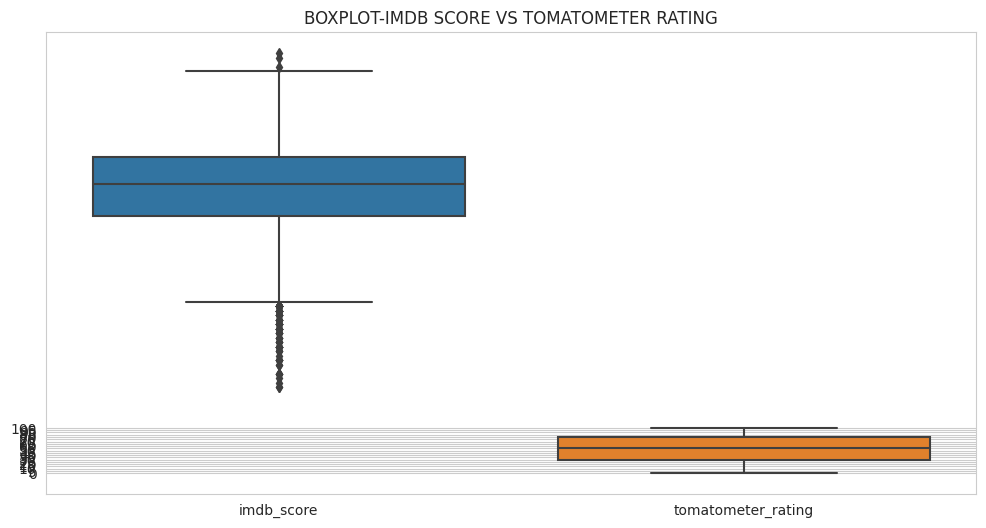

In [7]:
plt.figure(figsize=(12,6))     #create boxplot for imdb score and tomatometer rating
plt.yticks(np.arange(0,101,5))
sns.boxplot(data = final_file[['imdb_score','tomatometer_rating']]);
plt.title("BOXPLOT-IMDB SCORE VS TOMATOMETER RATING");





**Analysis Point**
From the above two plots we can observe that the most of the IMDB score are in a narrow band of 60 - 70 while most of the rotten tomatoes score lie in a bigger band of 30 - 80.

This might be due to the fact that audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

Let's also try and draw histograms for the above 2 variables.

We will be using following bin values for the histograms

In [8]:
bin_val = np.arange(0,101,10) # 0-10, 10-20, 20-30,.....90-100
bin_val

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

Text(0.5, 1.0, 'HISTOGRAM-IMDB VS ROTTEN TOMATO RATINGS')

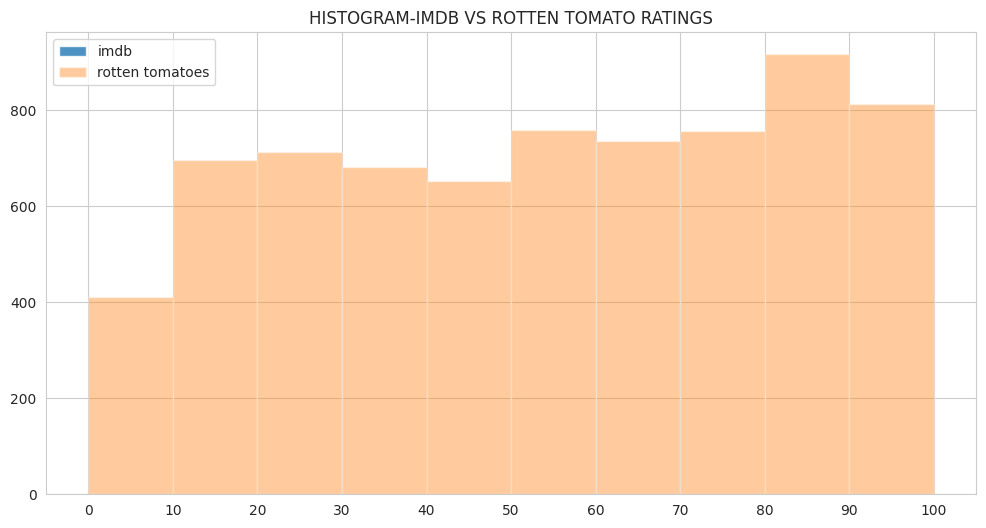

In [9]:
plt.figure(figsize=(12,6))
plt.xticks(bin_val)
plt.hist(final_file.imdb_score,alpha=0.8,bins=bin_val)
plt.hist(final_file.tomatometer_rating,alpha=0.4,bins=bin_val) #Draw imdb and rotten tomato score by histogram
plt.legend(['imdb','rotten tomatoes'])
plt.title("HISTOGRAM-IMDB VS ROTTEN TOMATO RATINGS")

**Final Analysis Points**

Based on above 2 bar graphs we can clearly observe that imdb rating are mostly concentrated aroung the 50-70 range.

While tomatometer rating are very evenly distributed.

This also proves our initial assumption about the difference in rating behaviour of audience and critics.

Audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

##**Ratings Preference across genre**
In this case we have to analyse the relationship of ratings with genre.

Genre - categorical

ratings - numerical

Two kinds of plots are useful here

bar plots - we can plot mean rating for each genre to check which genres are more preferrred
box plots - we can plot the ratings of each genre on a box plot to check the rating distribution for each genre.
But first by looking at the genre column we will observe that a given row of data contains multiple genre.

If we want to plot any box or bar plot we need to get the data such that one genre is mentioned in each row with the respective ratings.

We can do so using pandas .explode() functionality.

In [10]:
rating_genre=final_file[['genre','imdb_score','tomatometer_rating']]#Extract genre imdbscore and tomatometer rating and save in sepearte file

In [11]:
def convert_genre_list(genre):   #function to split the genre list
  split_genre = genre.split(',')
  remove_spaces_genre_list = [x.strip() for x in split_genre]
  return remove_spaces_genre_list

In [12]:
rating_genre['genre_list'] = rating_genre.apply(lambda row:convert_genre_list(row['genre']),axis=1)
rating_genre   #apply lamda function to split  and create sepearte  genre list

<ipython-input-12-0a82fad432b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_genre['genre_list'] = rating_genre.apply(lambda row:convert_genre_list(row['genre']),axis=1)


,genre,imdb_score,tomatometer_rating,genre_list
0,"Comedy, Drama, Family",830.0,100.0,"[Comedy, Drama, Family]"
1,"Drama, Romance",700.0,92.0,"[Drama, Romance]"
2,"Adventure, Comedy, Drama",820.0,100.0,"[Adventure, Comedy, Drama]"
3,"Drama, Sci-Fi",830.0,97.0,"[Drama, Sci-Fi]"
4,"Drama, Romance",810.0,98.0,"[Drama, Romance]"
...,...,...,...,...
7143,Drama,550.0,65.0,[Drama]
7144,"Comedy, Romance",610.0,17.0,"[Comedy, Romance]"
7145,"Comedy, Crime, Drama",630.0,75.0,"[Comedy, Crime, Drama]"
7146,"Comedy, Drama",710.0,74.0,"[Comedy, Drama]"


In [13]:
rating_genre.drop(['genre'],axis=1,inplace=True)  #drop genre column
rating_genre_explode = rating_genre.explode('genre_list')  #explode the genrelist
rating_genre_explode

<ipython-input-13-304764f7d834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_genre.drop(['genre'],axis=1,inplace=True)  #drop genre column


,imdb_score,tomatometer_rating,genre_list
0,830.0,100.0,Comedy
0,830.0,100.0,Drama
0,830.0,100.0,Family
1,700.0,92.0,Drama
1,700.0,92.0,Romance
...,...,...,...
7146,710.0,74.0,Comedy
7146,710.0,74.0,Drama
7147,650.0,51.0,Biography
7147,650.0,51.0,Drama


As you can see above we have got three column in the dataframe, genre column contains the genre name, imdb_score and tomatometer column (one thing to understand about this dataframe is that we have explded genre column to get this dataframe so, for each movie if there are more than one genre then more than one row is built for it, but due to this we have got the imdb_score for each genre in different row)

Let's draw bar plots for each genre with mean imdb and rotten tomato ratings

Text(0.5, 1.0, 'BARPLOT-GENRE VS IMDB SCORE')

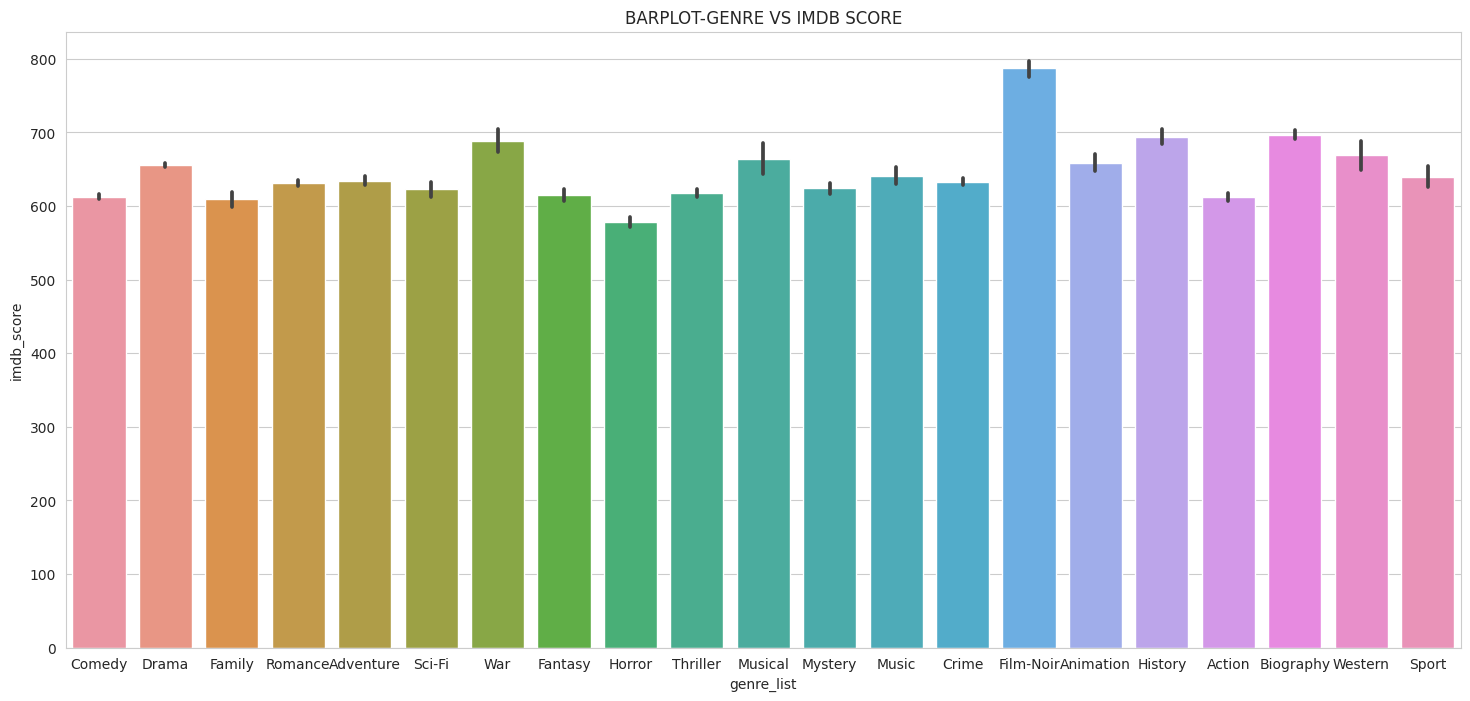

In [14]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'genre_list', y = 'imdb_score', data = rating_genre_explode)  #draw barplot for genre vs imdb score
plt.title("BARPLOT-GENRE VS IMDB SCORE")

Text(0.5, 1.0, 'BARPLOT-GENRE VS TOMATOMETER RATING')

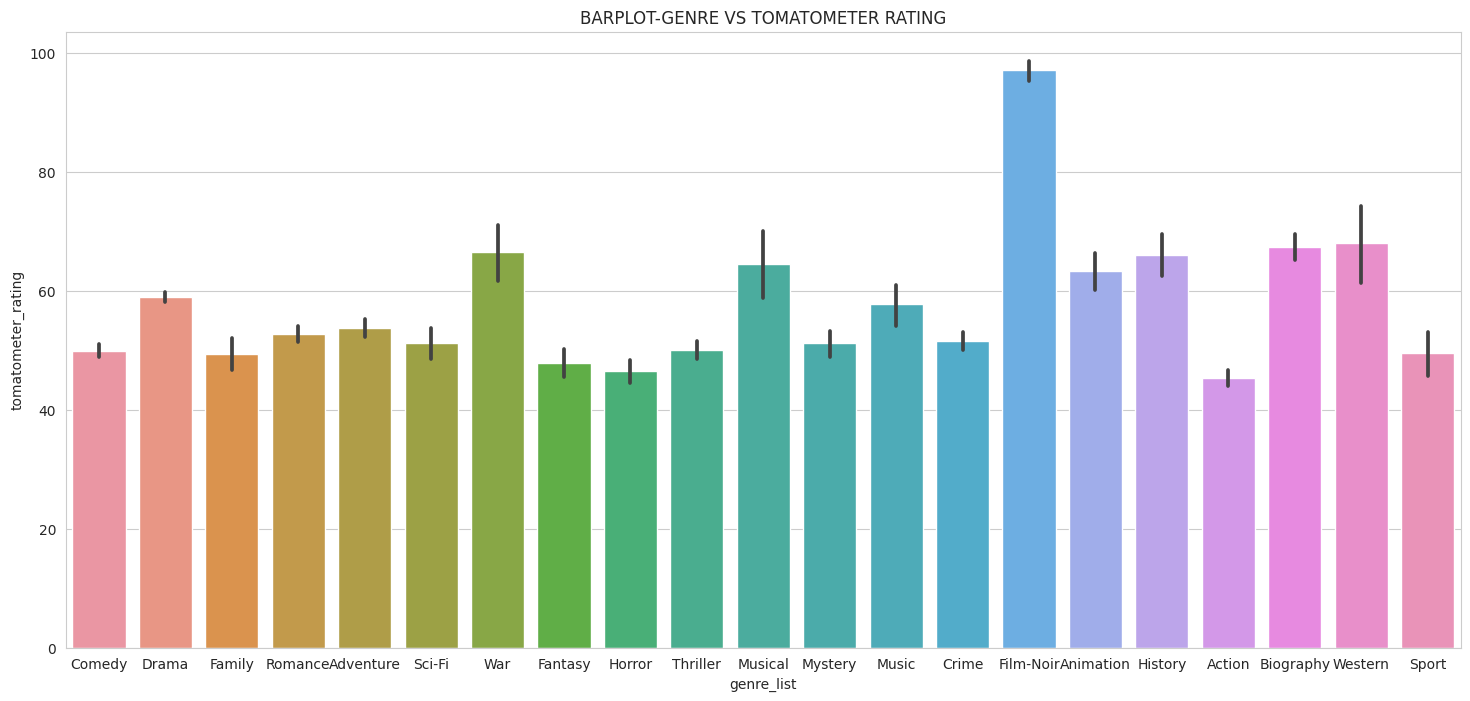

In [15]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'genre_list', y = 'tomatometer_rating', data = rating_genre_explode) #draw barplot for genre vs tomatometer rating
plt.title("BARPLOT-GENRE VS TOMATOMETER RATING")

**Analysis Points**<br>
Based on the above 2 plots, we can clrealy following points about genre preference according to two rating systems:

film-noir genre is more preferred in both of the rating system
Some genres like Animation, War, Western are equally preferred in both rating system.<br>

Overall it seems that in tomatometer rating(usually most of the genres are rated around 50) the genre are rated less than Imdb ratings(usually most of the genres are rated around 60).<br>
A good differnce in rating can be observed for following genre (usually for these genres, imdb mean rating is higher than rotten tomato mean rating)
Action
Comedy
Crime
Family
Thriller
we can also draw box plots using the above dataframe

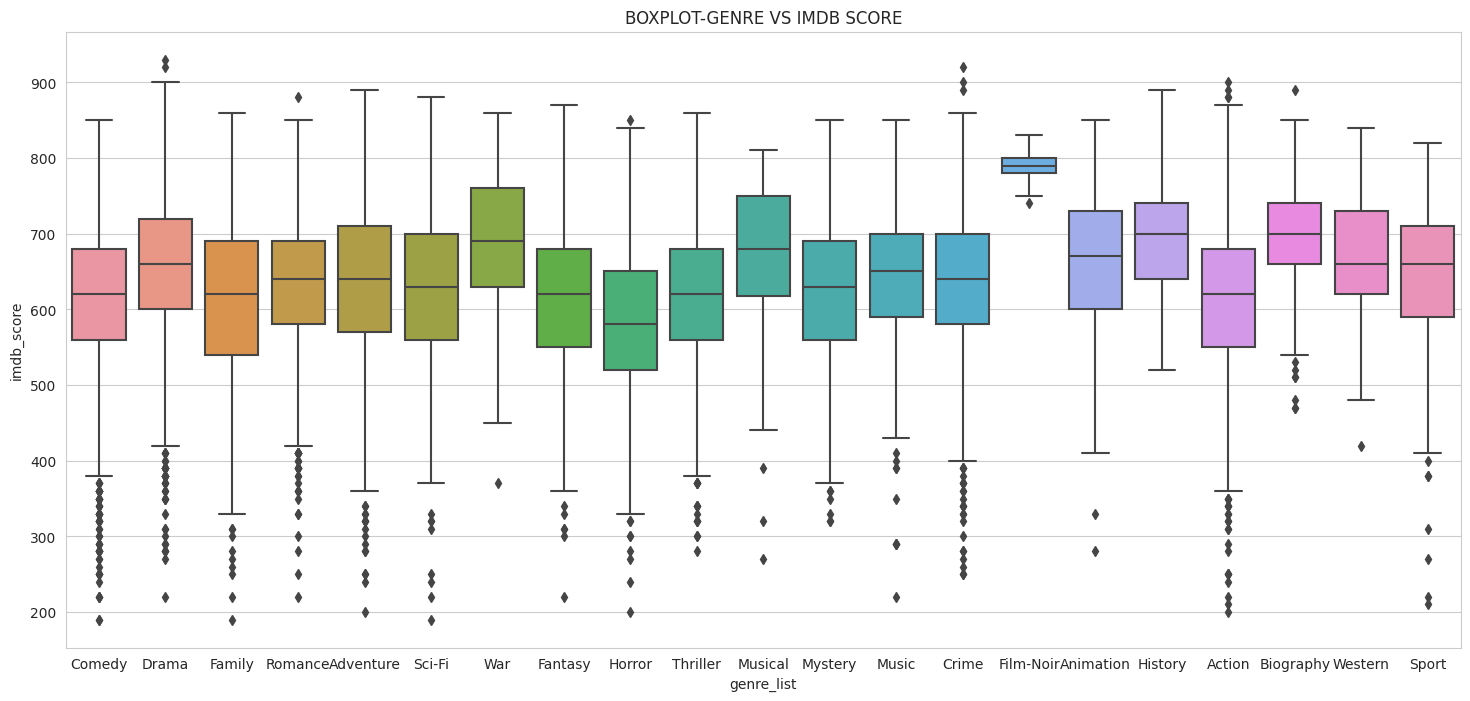

In [16]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'genre_list', y = 'imdb_score', data = rating_genre_explode) #boxplot for genrelist and imdb score
plt.title("BOXPLOT-GENRE VS IMDB SCORE");

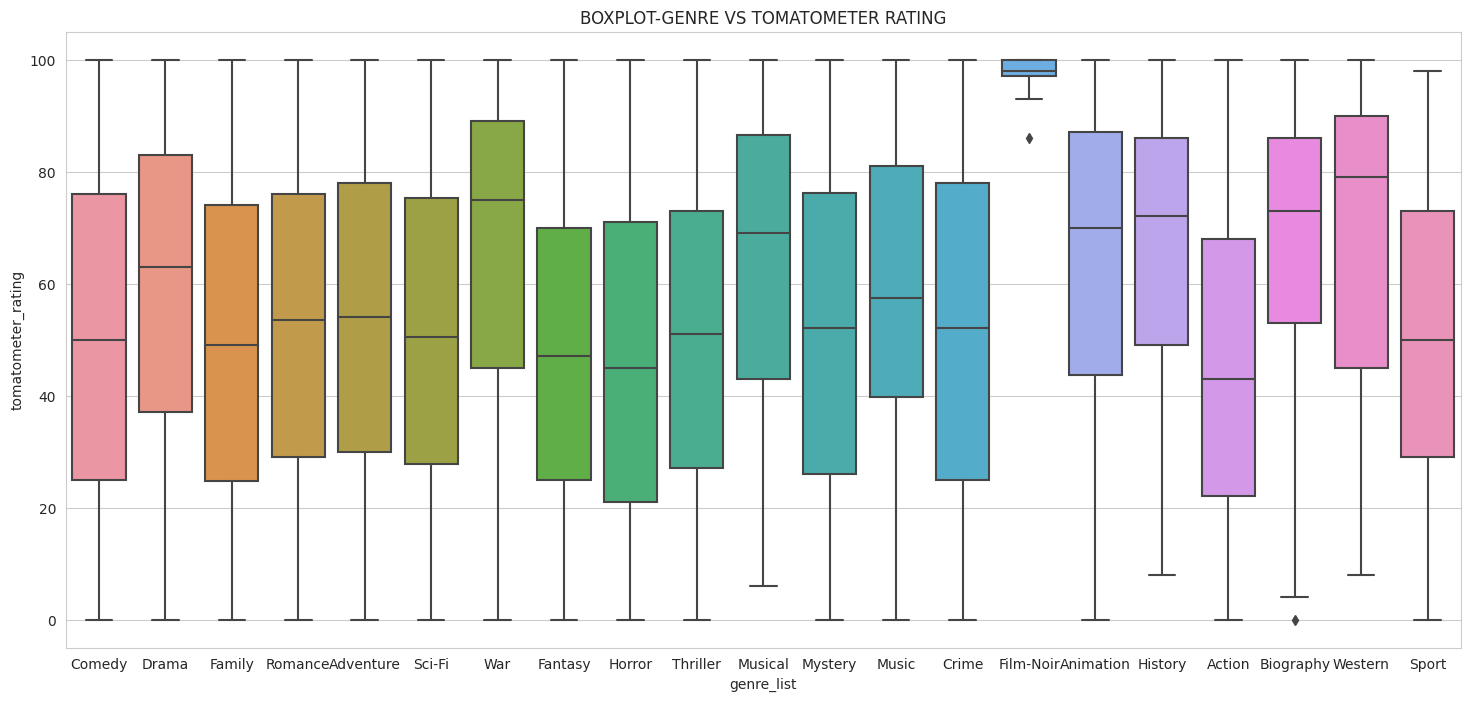

In [17]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'genre_list', y = 'tomatometer_rating', data = rating_genre_explode)#boxplot for genrelist and tomatometer rating
plt.title("BOXPLOT-GENRE VS TOMATOMETER RATING");



**Analysis Point:**

From the above two graph people rated averagely in imdb score for each genre around 50 to 70 there are many outliers present...

In tomatometer rating genre like war Drama Musical genre list film Noir Biography are liked more by the people.



###**Rating preference across year released** :
Are old movies liked more or newer movies are liked more
In this case we have to analyse the relationship of ratings with year.

Year- categorical

ratings - numerical

Two kinds of plots are useful here

bar plots - we can plot mean rating for each year to check which year(old mpovies or latest) are more preferrred
box plots - we can plot the ratings of each year on a box plot to check the rating distribution for each year.



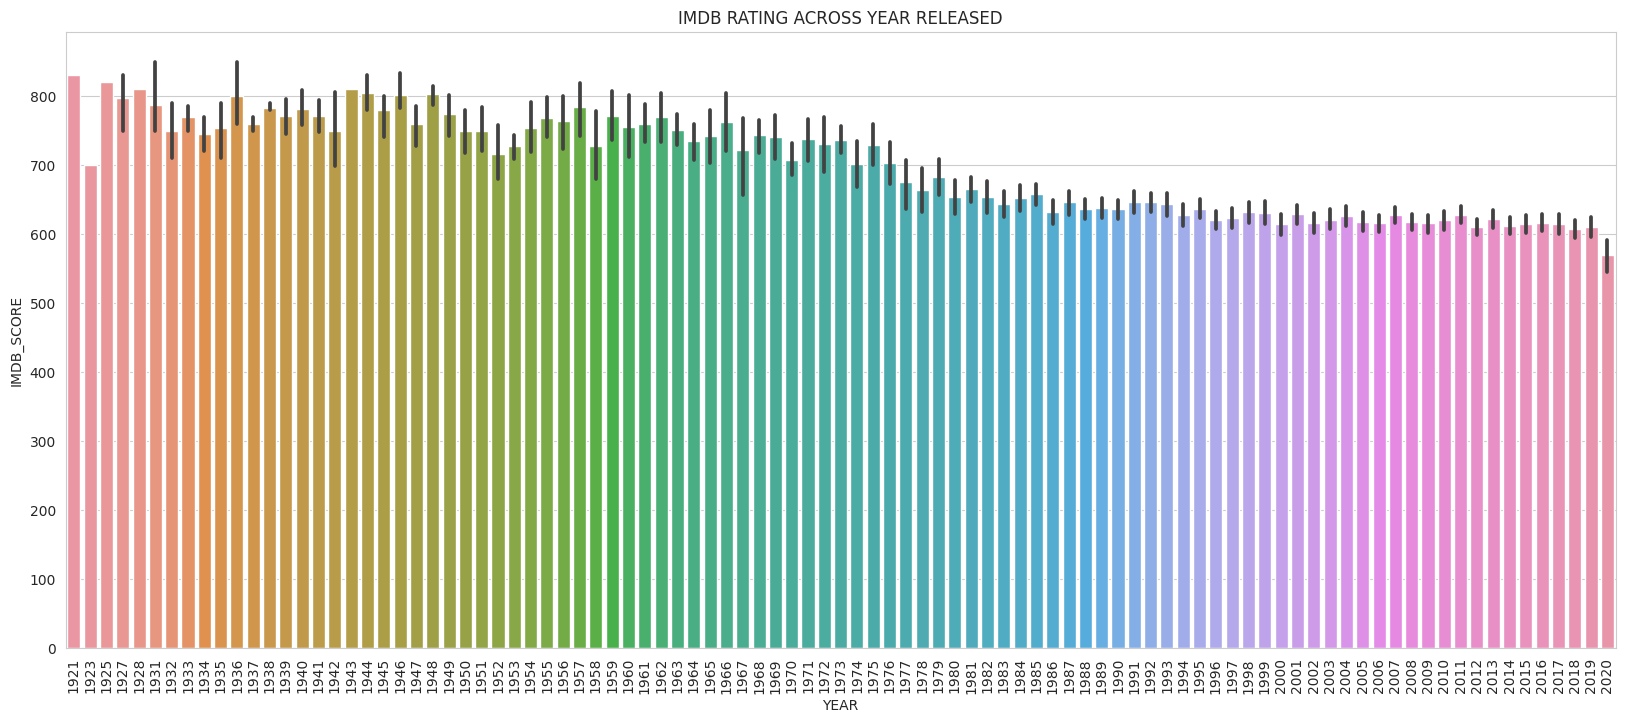

In [18]:

plt.figure(figsize=(20,8))
sns.barplot(x = 'year', y = 'imdb_score', data = final_file)#barplot year vs imdbscore
plt.xticks(rotation=90);
plt.title("IMDB RATING ACROSS YEAR RELEASED")
plt.xlabel("YEAR")
plt.ylabel("IMDB_SCORE");

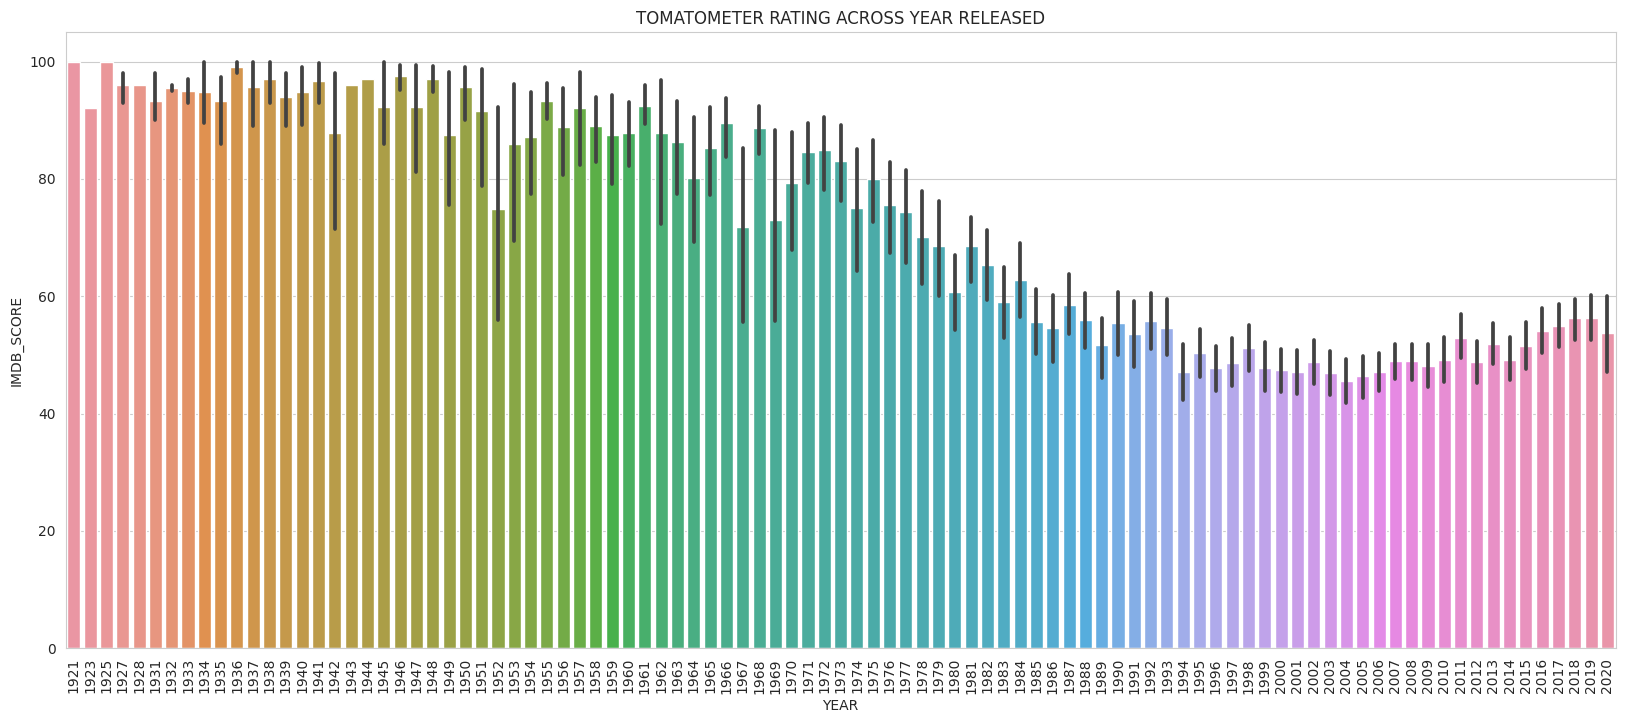

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'year', y = 'tomatometer_rating', data = final_file) #barplot for year vs tomatometer rating
plt.xticks(rotation=90);
plt.title("TOMATOMETER RATING ACROSS YEAR RELEASED")
plt.xlabel("YEAR")
plt.ylabel("IMDB_SCORE");

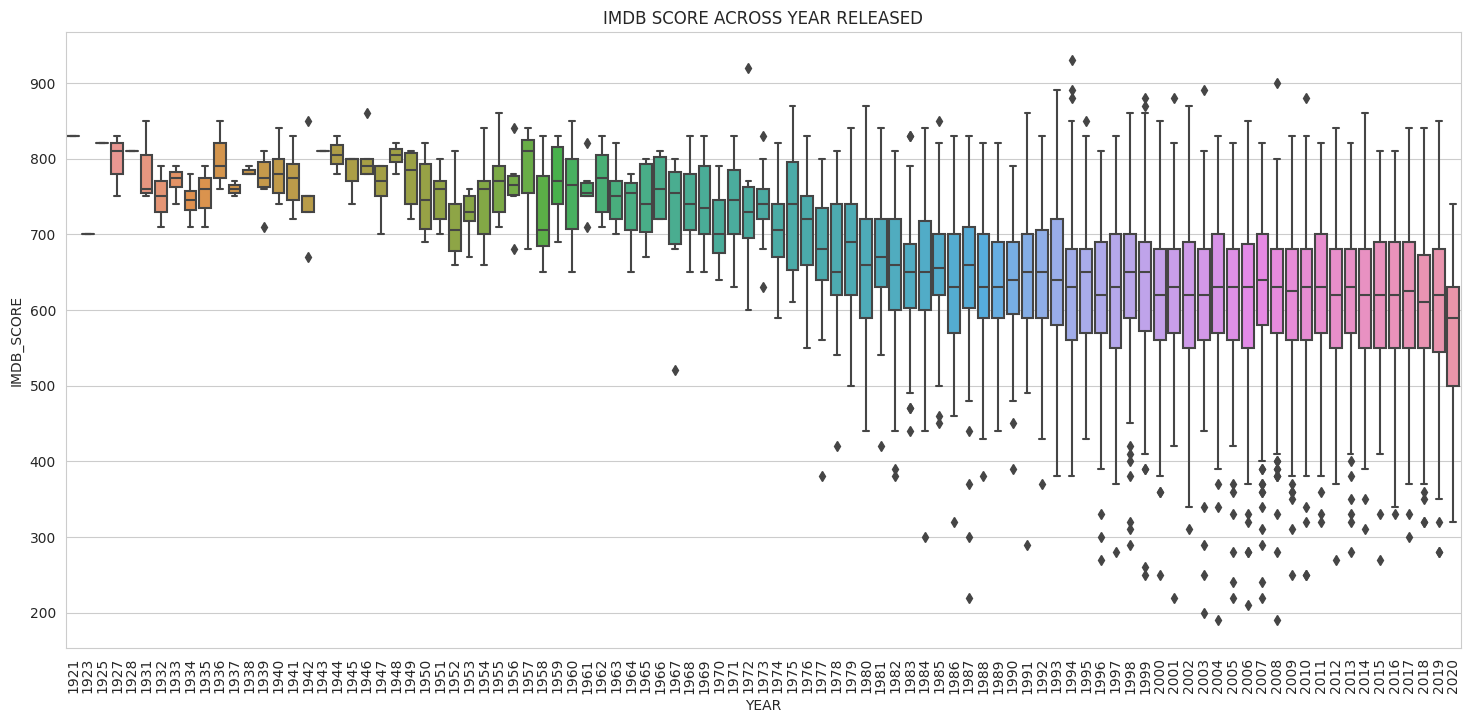

In [20]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'year', y = 'imdb_score', data =final_file);#boxplot for year vs imdbscore
plt.xticks(rotation=90)
plt.title("IMDB SCORE ACROSS YEAR RELEASED")
plt.xlabel("YEAR")
plt.ylabel("IMDB_SCORE");

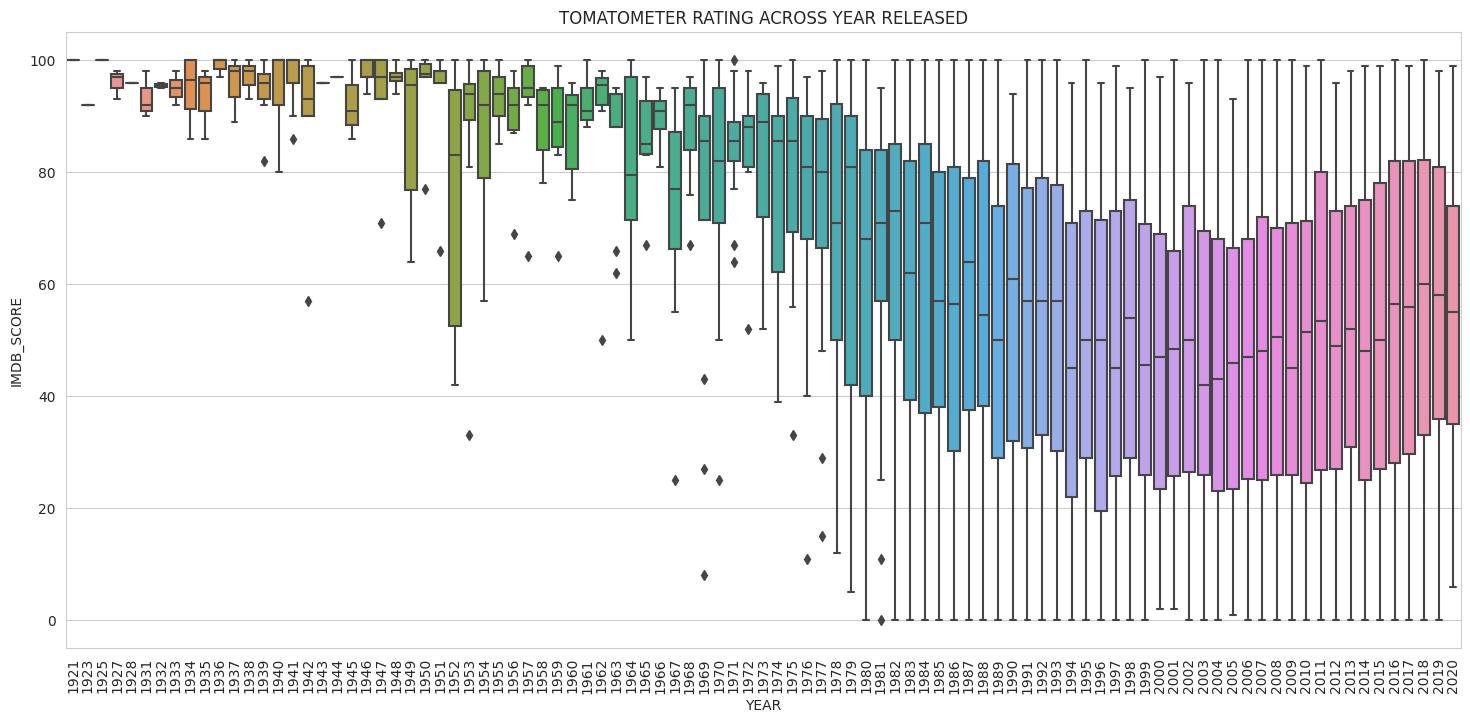

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'year', y = 'tomatometer_rating', data =final_file);#boxplot for year vs tomatometer rating
plt.xticks(rotation=90)
plt.title("TOMATOMETER RATING ACROSS YEAR RELEASED")
plt.xlabel("YEAR")
plt.ylabel("IMDB_SCORE");

**Analysis Points**
   Here from both barplot and boxplot:

   *People usually gives more ratings on old films than new films

   *Old films are highly rated and new movies are average rated.

   Conclusion:People like old movies than modern movies.
     

##**Rating preference across language**

Which language movies are best
In this case we have to analyse the relationship of ratings with different language .

Language- categorical

ratings - numerical

Two kinds of plots are useful here

bar plots - we can plot mean rating for each language to check which language movies  are more preferrred

box plots - we can plot the ratings of each language on a box plot to check the rating distribution for each language.

**Note:**
     Here we have to explode the language column first then remove the row where the language column value is None
     Here mainly we focussed on top 80 language Movies

In [22]:
Lang_Rating=pd.DataFrame(final_file[['language','imdb_score','tomatometer_rating']])#retrieve language tomatometer rating and imdb score
Lang_Rating_nonull=Lang_Rating.loc[Lang_Rating['language'].notnull()]#retrive only nonull values
Lang_Rating_nonull



,language,imdb_score,tomatometer_rating
0,"English, None",830.0,100.0
1,"None, English",700.0,92.0
2,"English, None",820.0,100.0
3,German,830.0,97.0
4,English,810.0,98.0
...,...,...,...
7143,English,550.0,65.0
7144,English,610.0,17.0
7145,English,630.0,75.0
7146,English,710.0,74.0


In [23]:
import math  #function to split the language column
def convert_lang_list(lang):
  split_lang = lang.split(',')
  res = [i.strip() for i in split_lang ]

  return res


In [24]:
#apply lambda function to split the language
Lang_Rating_nonull['lan_list'] = Lang_Rating_nonull.apply(lambda row:convert_genre_list(row['language']),axis=1)
Lang_Rating_nonull

<ipython-input-24-a5be100e31bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lang_Rating_nonull['lan_list'] = Lang_Rating_nonull.apply(lambda row:convert_genre_list(row['language']),axis=1)


,language,imdb_score,tomatometer_rating,lan_list
0,"English, None",830.0,100.0,"[English, None]"
1,"None, English",700.0,92.0,"[None, English]"
2,"English, None",820.0,100.0,"[English, None]"
3,German,830.0,97.0,[German]
4,English,810.0,98.0,[English]
...,...,...,...,...
7143,English,550.0,65.0,[English]
7144,English,610.0,17.0,[English]
7145,English,630.0,75.0,[English]
7146,English,710.0,74.0,[English]


In [25]:
Lang_Rating_nonull.drop(['language'],axis=1,inplace=True) #drop the language column
Lang_Rating_nonull_ex = Lang_Rating_nonull.explode('lan_list') #explode the lan list
Lang_Rating_nonull_ex


<ipython-input-25-735db055e254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lang_Rating_nonull.drop(['language'],axis=1,inplace=True) #drop the language column


,imdb_score,tomatometer_rating,lan_list
0,830.0,100.0,English
0,830.0,100.0,None
1,700.0,92.0,None
1,700.0,92.0,English
2,820.0,100.0,English
...,...,...,...
7143,550.0,65.0,English
7144,610.0,17.0,English
7145,630.0,75.0,English
7146,710.0,74.0,English


In [26]:
Lang_Rating_nonull_new=Lang_Rating_nonull_ex.loc[Lang_Rating_nonull_ex['lan_list']!="None"] #remove the row where language is null value
Lang_Rating_nonull_new

,imdb_score,tomatometer_rating,lan_list
0,830.0,100.0,English
1,700.0,92.0,English
2,820.0,100.0,English
3,830.0,97.0,German
4,810.0,98.0,English
...,...,...,...
7143,550.0,65.0,English
7144,610.0,17.0,English
7145,630.0,75.0,English
7146,710.0,74.0,English


In [27]:
Lang_Movie_List=Lang_Rating_nonull_new['lan_list'].value_counts().reset_index() #Explode lan list
Lang_Movie_List.columns=['Lang','Number_Of_Movies'] #rename the columns
Lang_Movie_List




,Lang,Number_Of_Movies
0,English,7021
1,Spanish,709
2,French,622
3,German,333
4,Italian,292
...,...,...
141,Washoe,1
142,Quenya,1
143,Tonga,1
144,Amharic,1


In [28]:
Movie_lan_extracted=Lang_Movie_List[Lang_Movie_List['Number_Of_Movies']>100] #Extract list of languages in which number of movies are more than 100
Movie_lan_extracted


,Lang,Number_Of_Movies
0,English,7021
1,Spanish,709
2,French,622
3,German,333
4,Italian,292
5,Russian,240
6,Japanese,153
7,Arabic,123
8,Hindi,105
9,Mandarin,102


In [29]:
arr=Movie_lan_extracted['Lang'] #Store those languages in one array
Movie_lan_extracted_final=Lang_Rating_nonull_new.loc[Lang_Rating_nonull_new['lan_list'].isin(arr)]#Extract only records of those languages list is in array
Movie_lan_extracted_final

,imdb_score,tomatometer_rating,lan_list
0,830.0,100.0,English
1,700.0,92.0,English
2,820.0,100.0,English
3,830.0,97.0,German
4,810.0,98.0,English
...,...,...,...
7143,550.0,65.0,English
7144,610.0,17.0,English
7145,630.0,75.0,English
7146,710.0,74.0,English


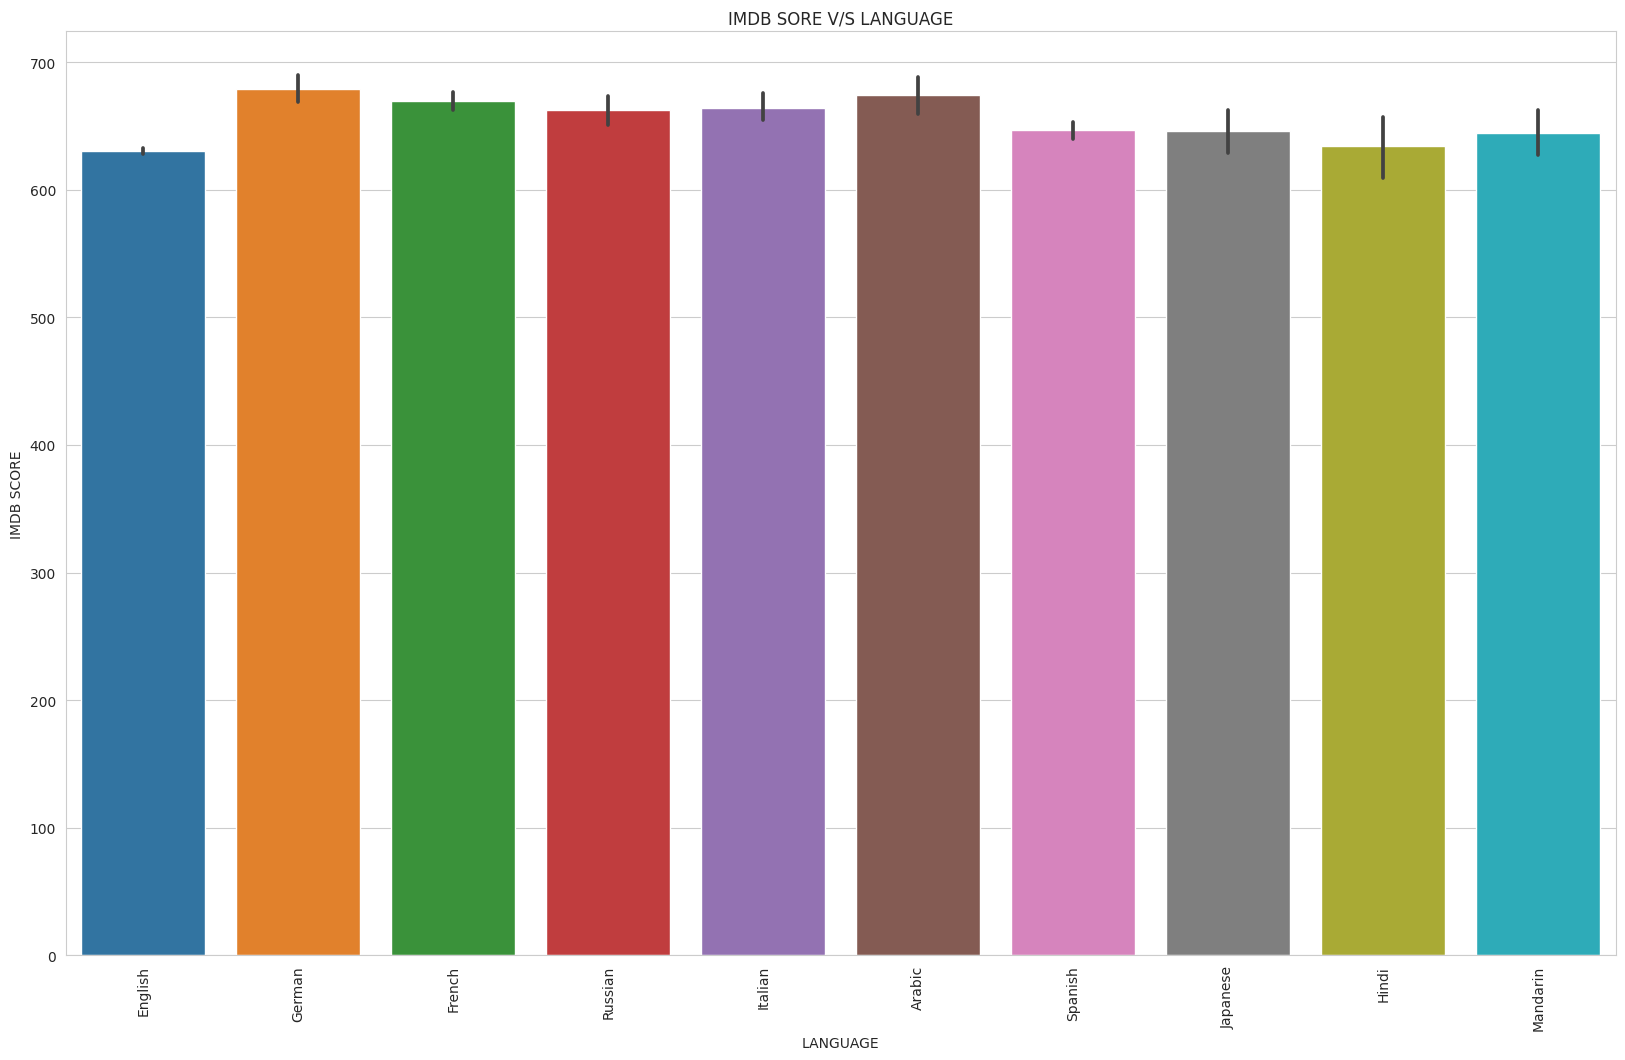

In [30]:

plt.figure(figsize=(20,12))
sns.barplot(x='lan_list',y='imdb_score',data=Movie_lan_extracted_final) #display barplot lanlist vs imdb score
plt.xticks(rotation=90)
plt.title("IMDB SORE V/S LANGUAGE")
plt.xlabel("LANGUAGE")
plt.ylabel("IMDB SCORE");

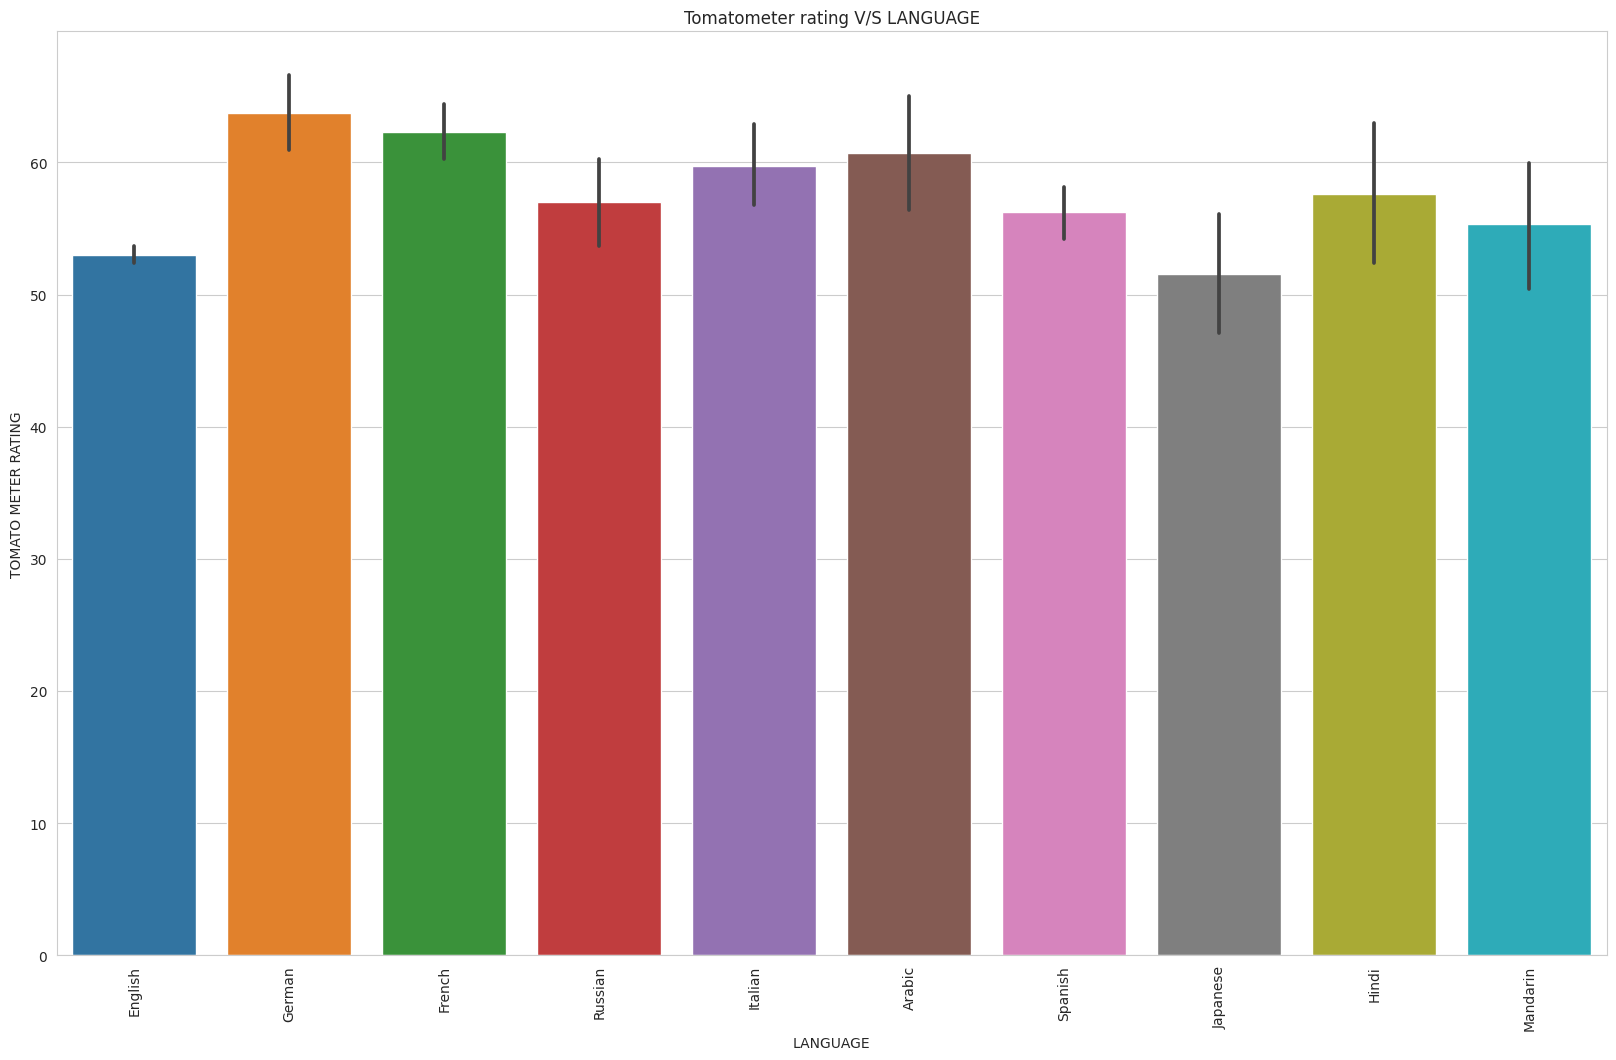

In [31]:


plt.figure(figsize=(20,12))
sns.barplot(x='lan_list',y='tomatometer_rating',data=Movie_lan_extracted_final) #display boxplot lanlist vs imdb score
plt.xticks(rotation=90)
plt.title("Tomatometer rating V/S LANGUAGE")
plt.xlabel("LANGUAGE")
plt.ylabel("TOMATO METER RATING");


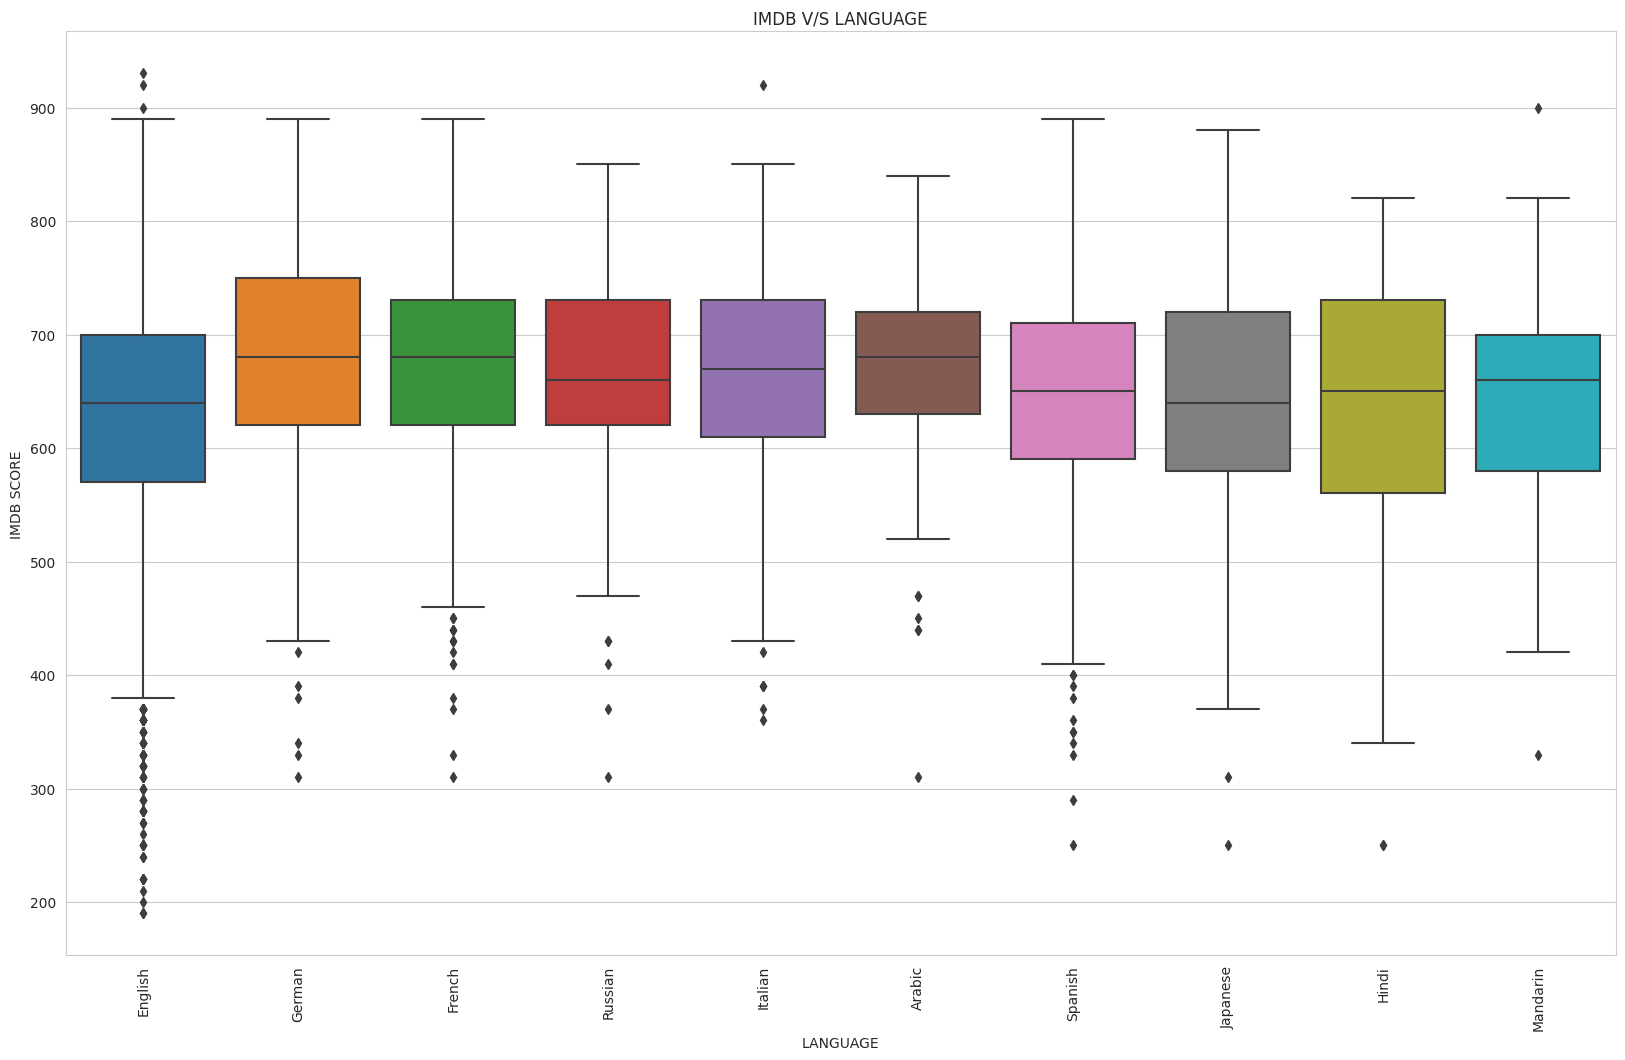

In [32]:
plt.figure(figsize=(20,12))
sns.boxplot(x='lan_list',y='imdb_score',data=Movie_lan_extracted_final) #display boxplot lanlist vs imdb score
plt.xticks(rotation=90)
plt.title("IMDB V/S LANGUAGE")
plt.xlabel("LANGUAGE")
plt.ylabel("IMDB SCORE");


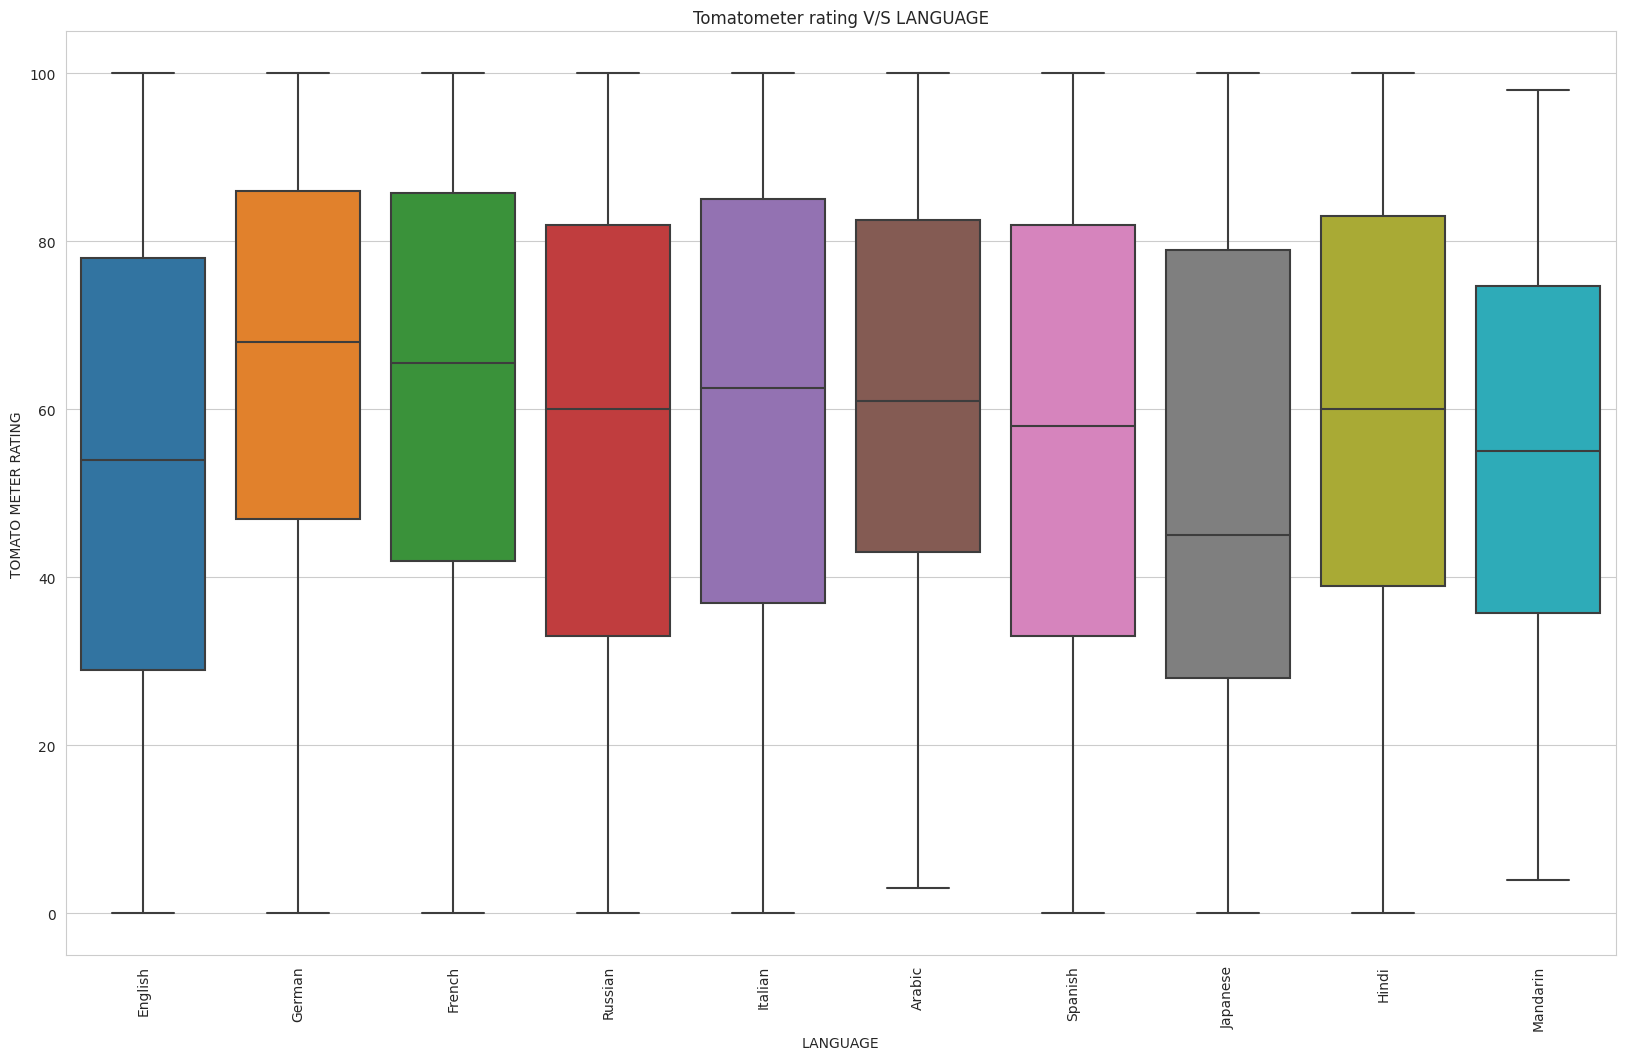

In [33]:
plt.figure(figsize=(20,12))
sns.boxplot(x='lan_list',y='tomatometer_rating',data=Movie_lan_extracted_final) #display barplot lanlist vs tomatometer
plt.xticks(rotation=90)
plt.title("Tomatometer rating V/S LANGUAGE")
plt.xlabel("LANGUAGE")
plt.ylabel("TOMATO METER RATING");



**Analysis Point**:


Comparing different languages whos number of movies are more than 100 we found

German and Arabic language movies are highly rated.

Out of those top 10 language movies English is the one language which is lowest rated




##**Rating prefernece across duration**


Which duration movies are liked?
In this case we have to analyse the relationship of ratings with duration of the movie .

Duration[Binned]- categorical

ratings - numerical

Three kinds of plots are useful here

bar plots - we can plot mean rating for each duration[binned] to check which duration movies are more preferrred

box plots - we can plot the ratings of each duration[binned] on a box plot to check the rating distribution for each language.

sctter plot-We can plot rating versus duration to check the correlation between these two

Note: Here we have to create new column to bin the duration for clear graph




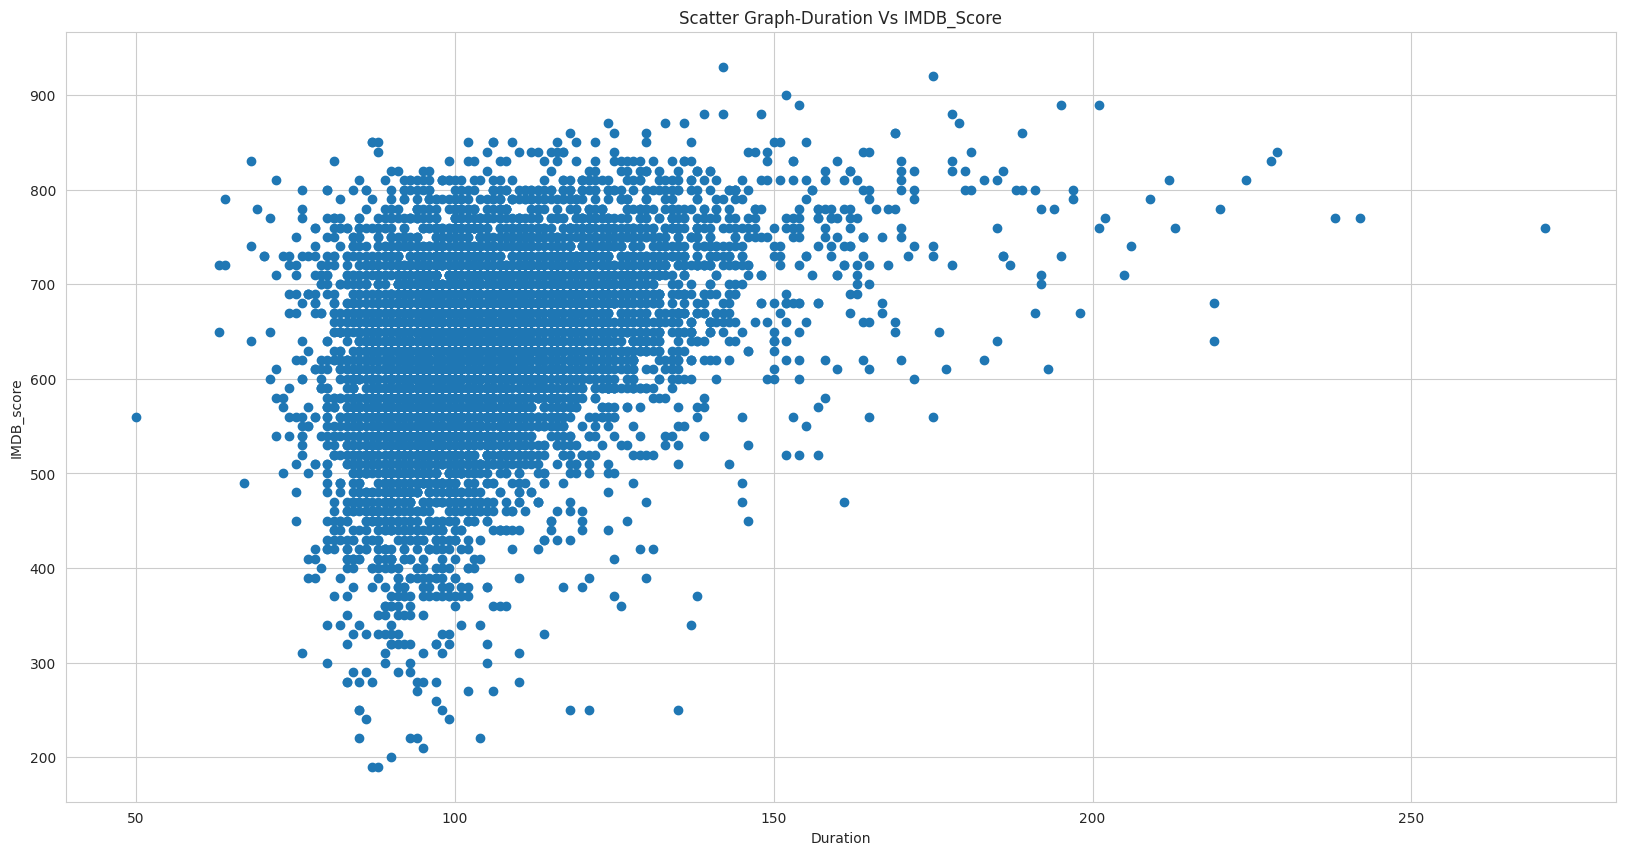

In [34]:

plt.figure(figsize=(20,10))
plt.scatter(x='duration',y='imdb_score',data=final_file) #scatter plot for duration vs imdb score
plt.title("Scatter Graph-Duration Vs IMDB_Score")
plt.xlabel("Duration")
plt.ylabel("IMDB_score");

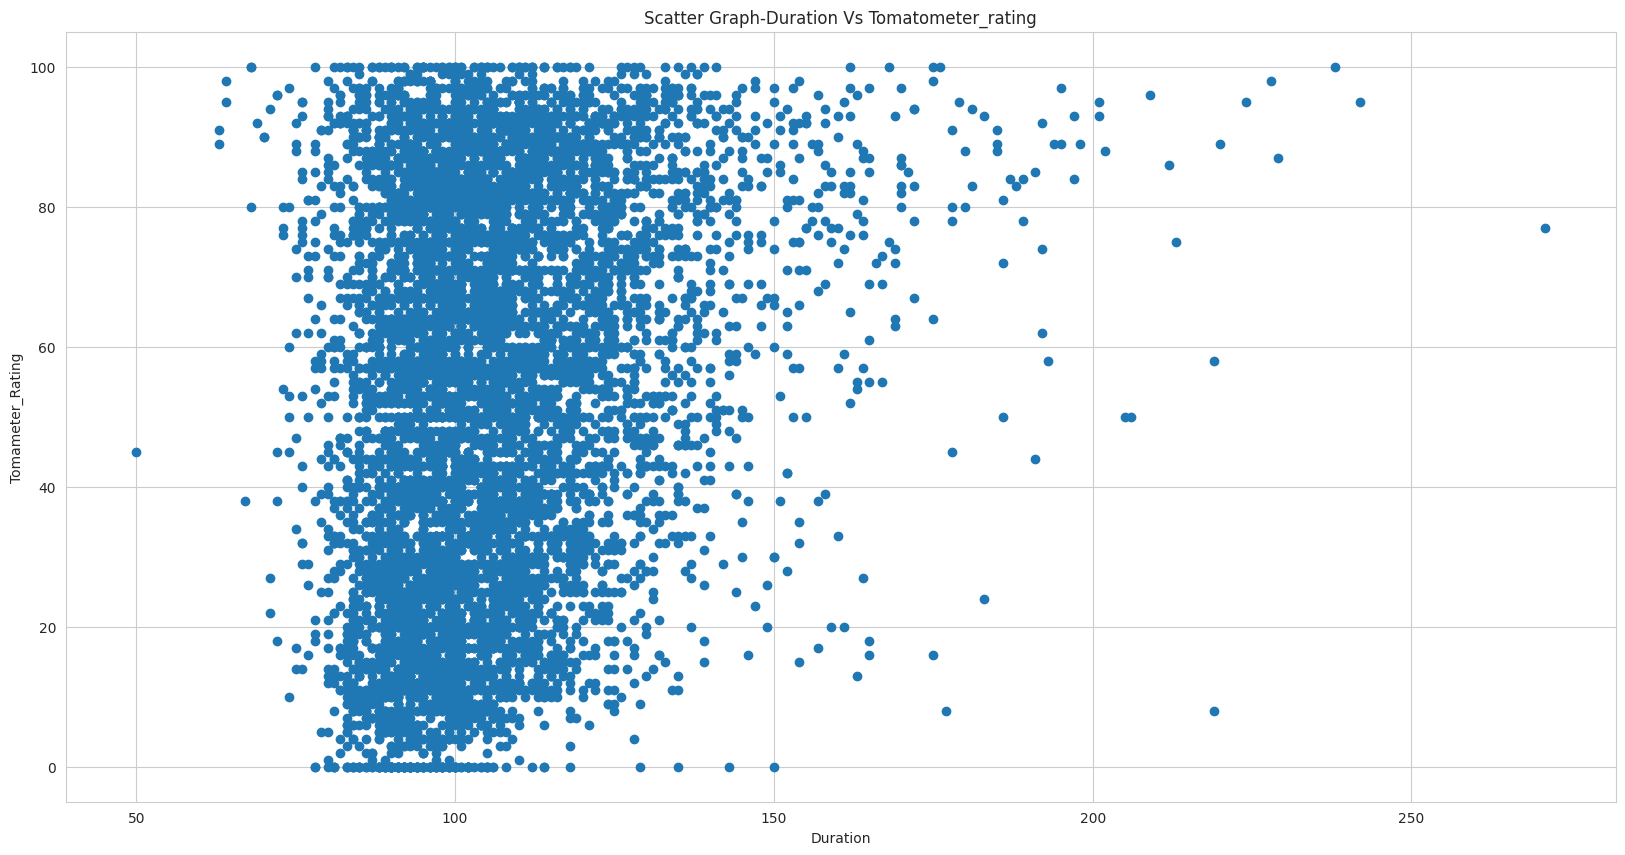

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(x='duration',y='tomatometer_rating',data=final_file) #scatter plot for duration vs tomatometer rating
plt.title("Scatter Graph-Duration Vs Tomatometer_rating")
plt.xlabel("Duration")
plt.ylabel("Tomameter_Rating");

In [36]:

bins = [50,100,150,200,250]
final_file['binned_duration'] = pd.cut(final_file['duration'], bins)  #create binned column for duration



In [37]:
a=final_file['binned_duration'].value_counts().reset_index()
a.columns=['binn','Number of Movies']
a

,binn,Number of Movies
0,"(100, 150]",3839
1,"(50, 100]",3118
2,"(150, 200]",173
3,"(200, 250]",16


In [38]:
bin_extracted=a[a['Number of Movies']>100]
bin_extracted


,binn,Number of Movies
0,"(100, 150]",3839
1,"(50, 100]",3118
2,"(150, 200]",173


In [39]:
arrbin=bin_extracted['binn'] #Store those actors name in one array
bin_extracted=final_file.loc[final_file['binned_duration'].isin(arrbin)]#extract records based on bins stored in array
bin_extracted

,movie_title,year,genre,duration,country,language,imdb_score,world_gross_income_num,movie_age,tomatometer_rating,binned_duration
0,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",830.0,0.026916,101,100.0,"(50, 100]"
1,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,"None, English",700.0,0.011233,99,92.0,"(50, 100]"
2,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",820.0,0.026916,97,100.0,"(50, 100]"
3,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,830.0,1.349711,95,97.0,"(150, 200]"
4,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,English,810.0,0.121107,95,98.0,"(50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...
7143,The Sound of Silence,2019,Drama,85,USA,English,550.0,0.021994,3,65.0,"(50, 100]"
7144,Jexi,2019,"Comedy, Romance",84,"USA, Canada",English,610.0,9.341824,3,17.0,"(50, 100]"
7145,The Death of Dick Long,2019,"Comedy, Crime, Drama",100,USA,English,630.0,0.036856,3,75.0,"(50, 100]"
7146,The King of Staten Island,2020,"Comedy, Drama",136,USA,English,710.0,2.060358,2,74.0,"(100, 150]"


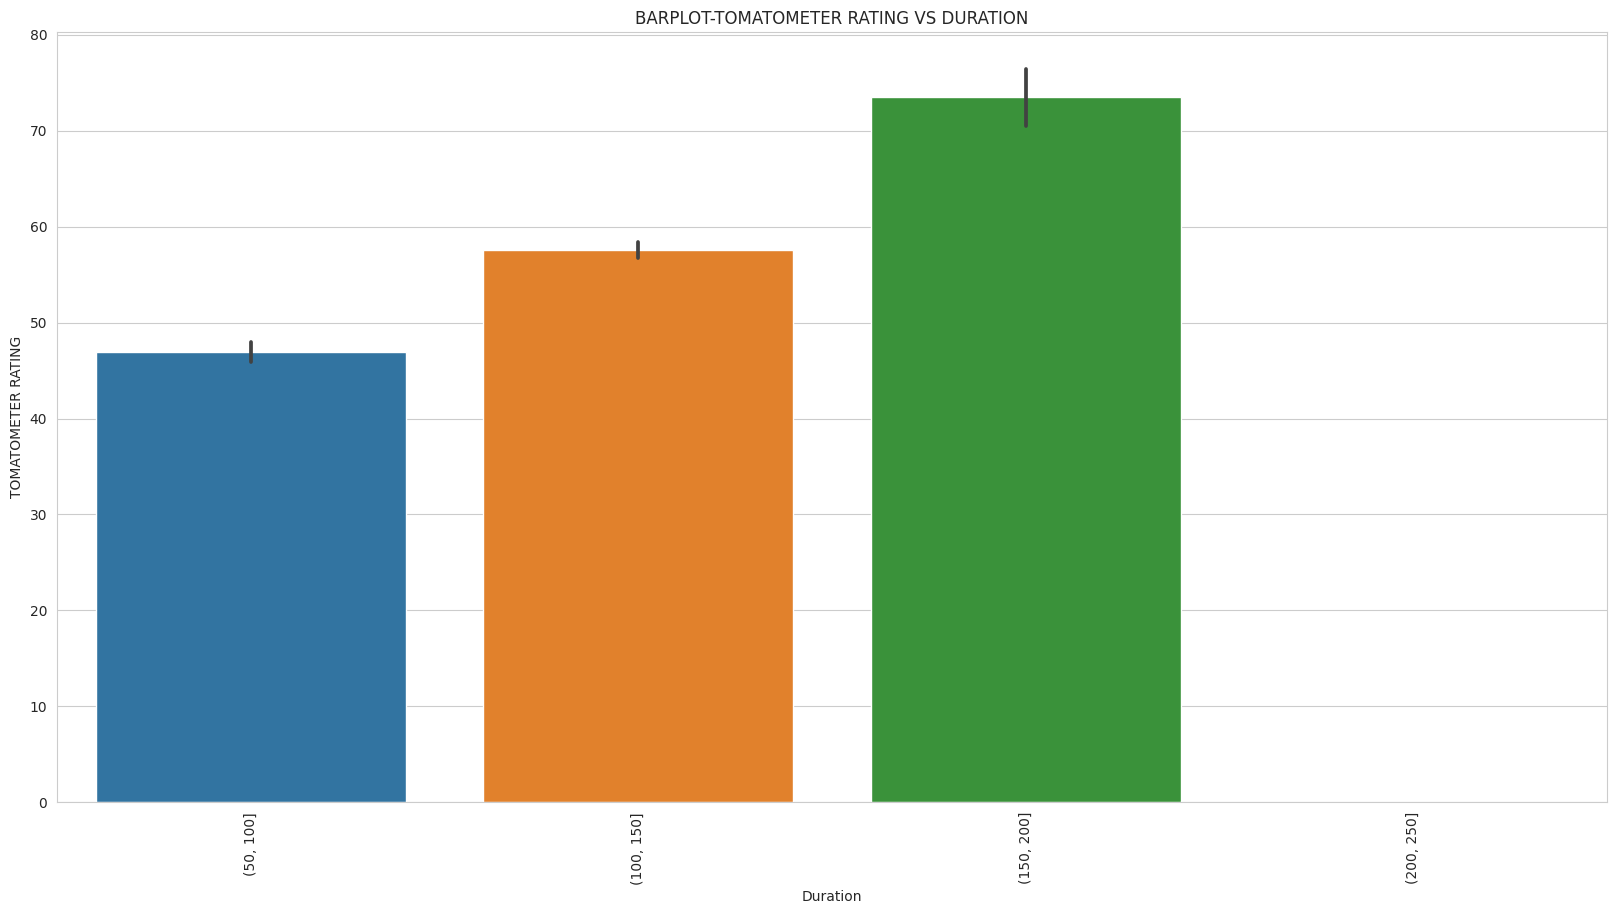

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x='binned_duration',y='tomatometer_rating',data=bin_extracted)#barplot for binned duration vs tomatometer rating
plt.xticks(rotation=90);
plt.title("BARPLOT-TOMATOMETER RATING VS DURATION")
plt.xlabel("Duration")
plt.ylabel("TOMATOMETER RATING");


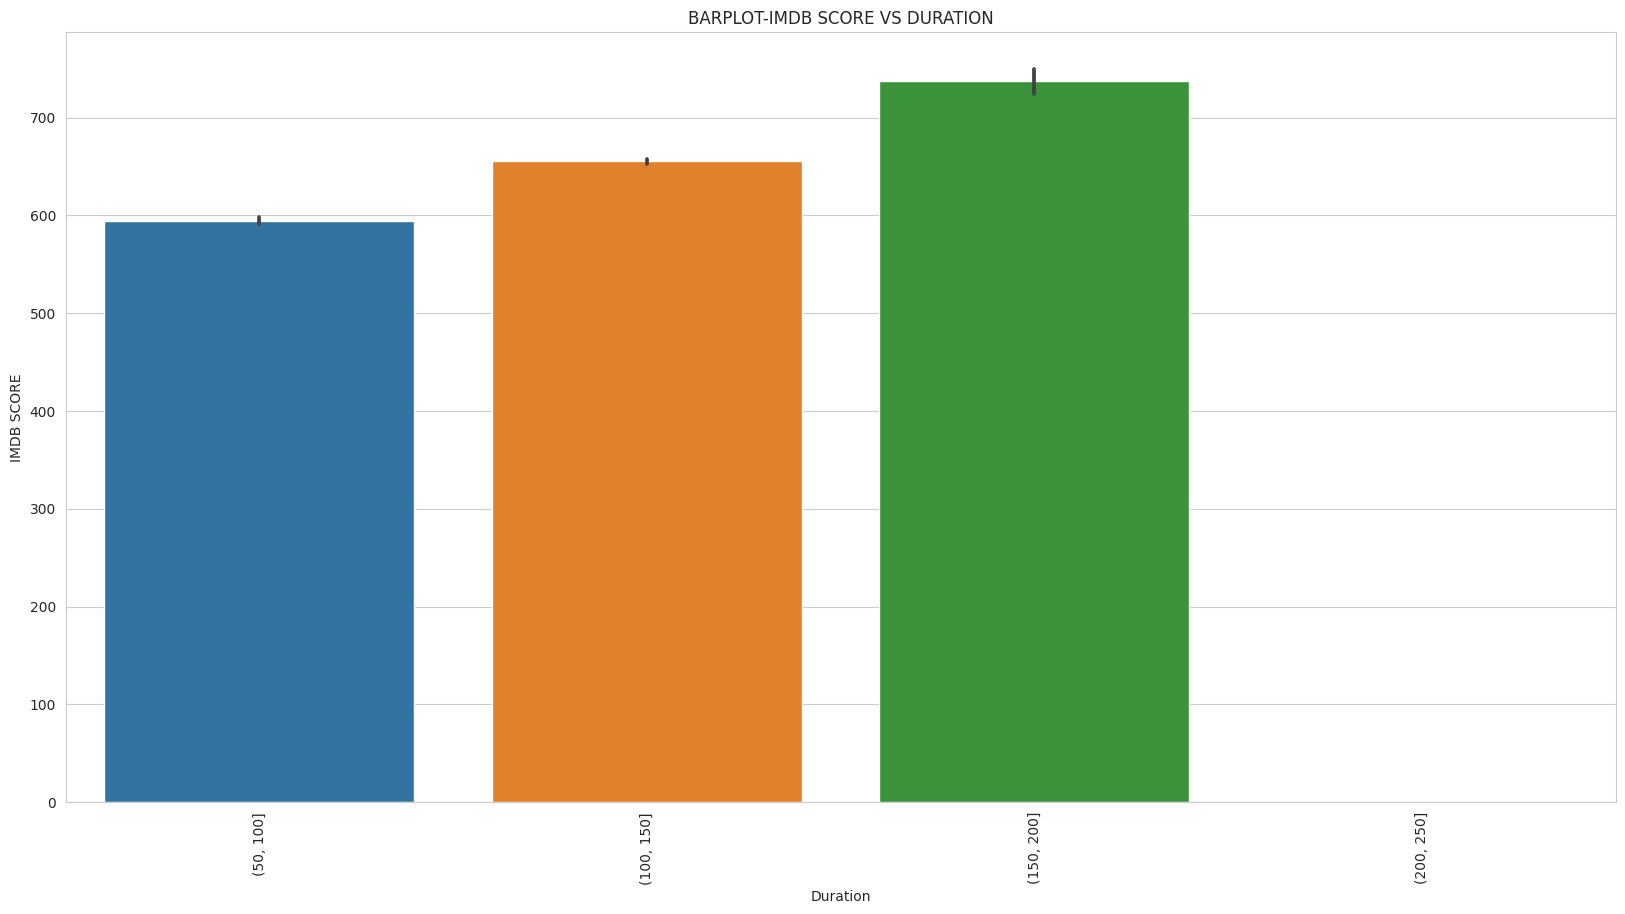

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='binned_duration',y='imdb_score',data=bin_extracted) #barplot for binned duration vs imdb score
plt.xticks(rotation=90)
plt.title("BARPLOT-IMDB SCORE VS DURATION")
plt.xlabel("Duration")
plt.ylabel("IMDB SCORE");


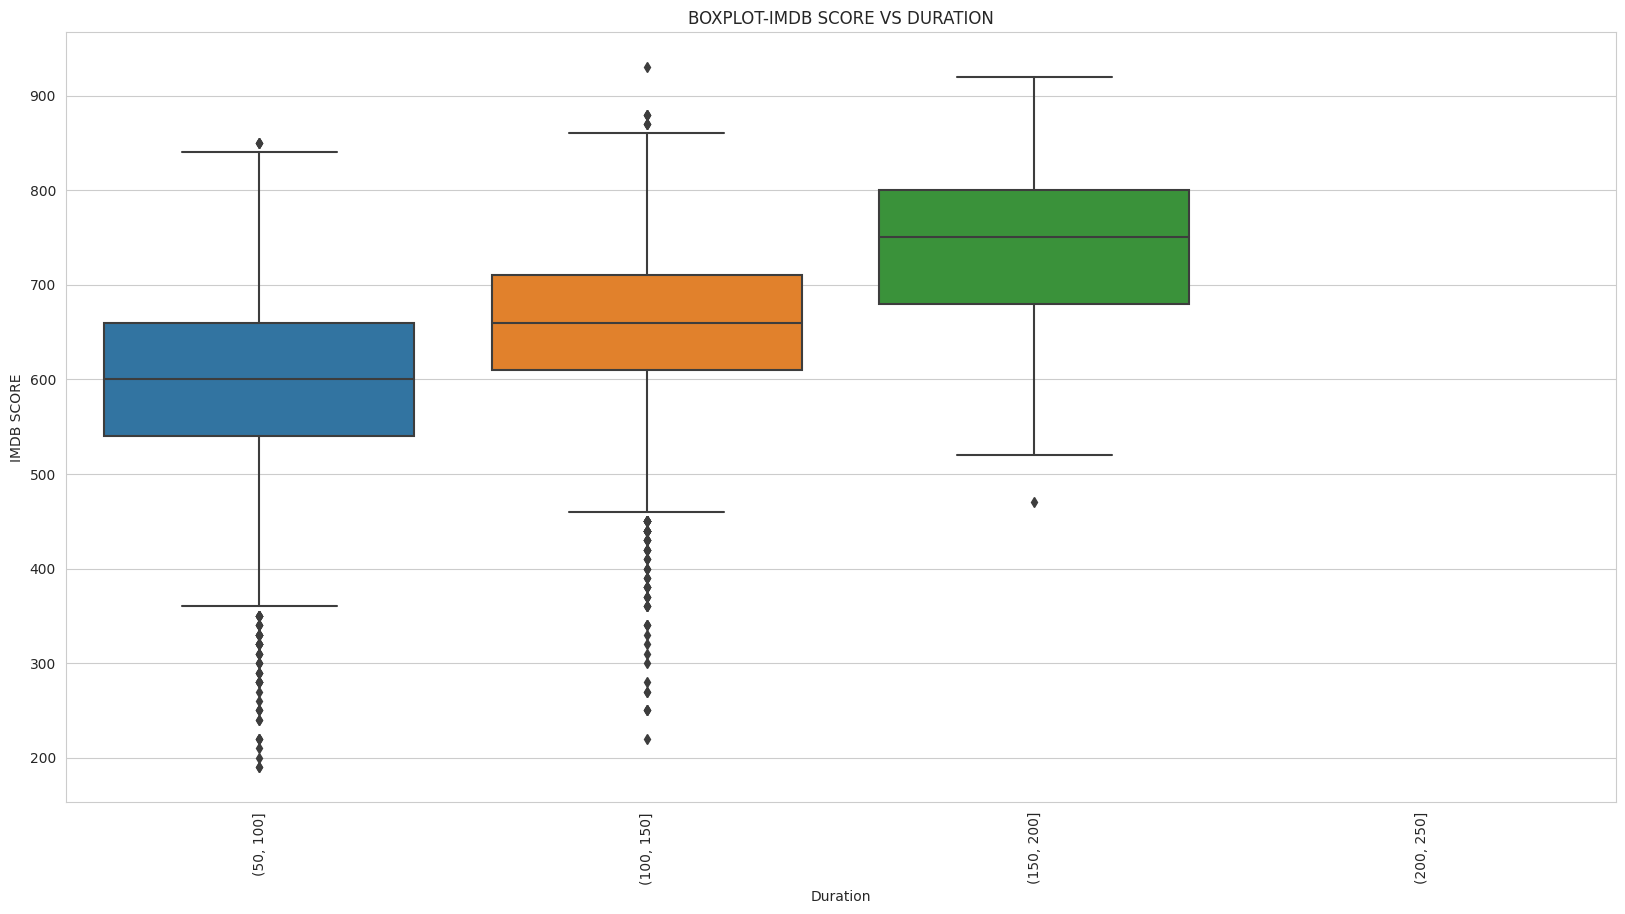

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x='binned_duration',y='imdb_score',data=bin_extracted)#boxplot for binned duration vs imdb score
plt.xticks(rotation=90)
plt.title("BOXPLOT-IMDB SCORE VS DURATION")
plt.xlabel("Duration")
plt.ylabel("IMDB SCORE");



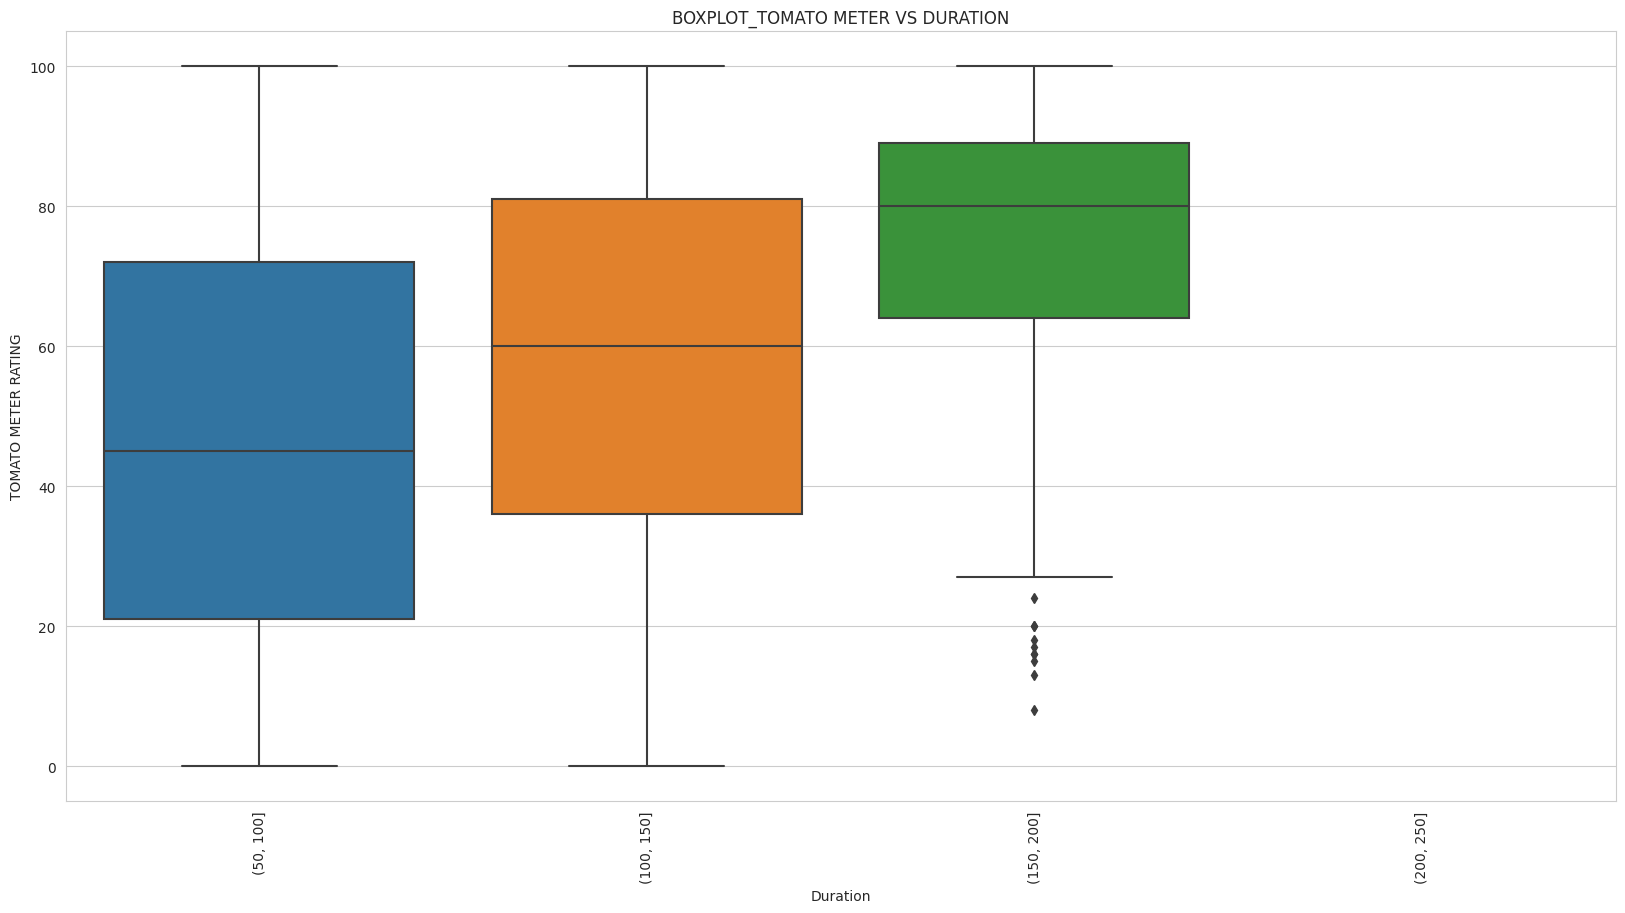

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(x='binned_duration',y='tomatometer_rating',data=bin_extracted) #boxplot for binned duration vs tomatometer rating
plt.xticks(rotation=90);
plt.title("BOXPLOT_TOMATO METER VS DURATION")
plt.xlabel("Duration")
plt.ylabel("TOMATO METER RATING");

**Analysis Point**

Above graph mainly says people likes more the long duration movies

Also it says medium and short duration movies atre not liked much by the people.

Also medium duration movies are less compare to short and long duration movies


##**Rating preference across actor**


Which actor movies are liked? In this case we have to analyse the relationship of ratings with actor .

Actor- categorical

ratings - numerical

Two kinds of plots are useful here

bar plots - we can plot mean rating for each actor to check which actor movies are more preferrred

box plots - we can plot the ratings of each actor on a box plot to check the rating distribution for each actor.



Note: Here we have to count number of movies for each actor ,then based on that priority create graph for better result.

In [44]:
Actor_ratings=final_file[['actors','imdb_score','tomatometer_rating']] #extract actore imdb score tomatometer rating


KeyError: ignored

In [45]:
final_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   movie_title             7148 non-null   object  
 1   year                    7148 non-null   int64   
 2   genre                   7148 non-null   object  
 3   duration                7148 non-null   int64   
 4   country                 7148 non-null   object  
 5   language                7142 non-null   object  
 6   imdb_score              7148 non-null   float64 
 7   world_gross_income_num  7148 non-null   float64 
 8   movie_age               7148 non-null   int64   
 9   tomatometer_rating      7143 non-null   float64 
 10  binned_duration         7146 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 565.8+ KB


In [ ]:
def string_to_list(actors): #function to split actor list
     str_to_lis=actors.split(',')
     res=[x.strip() for x in str_to_lis]
     return res


In [ ]:
#apply lambda function to split each actor list
Actor_ratings['actors_list']=Actor_ratings.apply(lambda row:string_to_list(row['actors']),axis=1)
Actor_ratings



In [ ]:
Actor_ratings.drop(['actors'],axis=1,inplace=True) #drop actors column then explode the list
Actor_ratings_ex =Actor_ratings.explode('actors_list')



In [ ]:
Actor_ratings_ex

In [ ]:
Actors_list=Actor_ratings_ex['actors_list'].value_counts().reset_index() #Explode actor list
Actors_list.columns=['Actor','Number_Of_Movies'] #rename the columns
Actors_list

In [ ]:
actors_extracted=Actors_list[Actors_list['Number_Of_Movies']>45] #Extract list of actors whose movies are morevthan 45
actors_extracted.head(45)


In [ ]:
array1=actors_extracted['Actor'] #Store those actors name in one array
Actor_High_Rate=Actor_ratings_ex.loc[Actor_ratings_ex['actors_list'].isin(array1)]# Extract the records of actors only whose movies are more than 45
Actor_High_Rate

In [ ]:
#plot bar graph to display top 100 imdb score actors
plt.figure(figsize=(19,8))
plt.title("BARPLOT-TOP ACTORS VS IMDB SCORE")
sns.barplot(x=Actor_High_Rate['actors_list'],y=Actor_High_Rate['imdb_score'])
plt.xticks(rotation=90);
plt.xlabel("ACTORS_LIST")
plt.ylabel("IMDB SCORE");

In [ ]:
plt.figure(figsize=(19,8))
plt.title("BARPLOT-TOP ACTORS VS TOMATO METER RATING")
sns.barplot(x=Actor_High_Rate['actors_list'],y=Actor_High_Rate['tomatometer_rating'])
plt.xticks(rotation=90);
plt.xlabel("ACTORS_LIST")
plt.ylabel("TOMATO METER RATING");



In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='actors_list',y='imdb_score',data=Actor_High_Rate) #boxplot for duration vs tomatometer rating
plt.xticks(rotation=90);
plt.title("BOXPLOT_IMDB SCORE VS DURATION")
plt.xlabel("ACTORS")
plt.ylabel("IMDB SCORE");

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='actors_list',y='tomatometer_rating',data=Actor_High_Rate) #boxplot for duration vs tomatometer rating
plt.xticks(rotation=90);
plt.title("BOXPLOT_TOMATO METER RATING VS DURATION")
plt.xlabel("ACTORS")
plt.ylabel("TOMATO METER RATING");

**Analysis Point**

Above graph clearly shows

   "Robert Downey Jr","John Goodman","Woofy Harrelson","Robert De Niro" are highly rated actors.

   "Bruce Wills" who is the least rated actor.
   
   All these actors have acted in more than 40 films

**Movies earning potential analysis**
Using worldwide_gross_income column data we will analyse following points

**Analyse earning potential of movies** - analyse worldwide gross income column or distribution of worldwide gross income column

**Earning potential and Rating Comparison** - does movies with higher rating have higher earning potential

**Earning potential and Genre Comparison** - does genre affect the earning of a movie

**Earning potential and country Comparison** - does the earning of a movie differ based on the country it is getting released into.

**Earning potential and language Comparison** - how does language affect earning of a movie

**Earning potential and duration Comparison** - do the earning of high and low duration movie differ

**Earning potential and actors acted comparison**-do the earning is high for particular actor

In [ ]:
final_file.head()

##**Analyse earning potential of movies:**
     Here it clearly shows that earning potential of movies
     


In [ ]:
sns.set_style('whitegrid') #create histogram to show the disytribution of world gross income
plt.hist(final_file.world_gross_income_num,bins=np.arange(0,600,50));

**Analysis Point**

   Here around 5000 Movies are earning 0-50 millions.
   Around 800 Movies are earning 50-100 millions

##**Earning potential and Rating Comparison** -

 Does movies with higher rating have higher earning potential

 Here mainly we have taken one graph for analysis
 Two values
       Ratings-Numerical
       Income_Numerical





In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x='imdb_score',y='world_gross_income_num',data=final_file) #plot scatter graph for imdb score vs world gross income num
plt.title("SCATTER GRAPH-WORLD GROSS INCOME VS IMDB SCORE")
plt.ylabel("World_Gross_Income")
plt.xlabel("IMDB_score");

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x='tomatometer_rating',y='world_gross_income_num',data=final_file)#plot scatter graph for tomatometer rating vs world gross income
plt.title('SCATTER GRAPH-TMATOMETER RATING VS WORLD GROSS INCOME')
plt.ylabel("World_Gross_Income")
plt.xlabel("tomatometer_rating");

**Analysis Point**

Here the graph says that higher the rating  higher the income.<br>
So quality of the movie is very important to improve rating.<br>
There is a positive corelation between rating and income of the movie

##**Earning potential and Genre Comparison** -

Does genre affect the earning of a movie

Genre- categorical

Income - numerical

Two kinds of plots are useful here

bar plots - we can plot mean Income for each Genre to check which Genre movies are more preferrred

box plots - we can plot the Income of each Genre on a box plot to check the Income distribution for each Genre.


In [ ]:
World_income_genre=final_file[['genre','world_gross_income_num']] #extract genre and world gross income num


In [ ]:
def convert_genre_list(genre): # function to split the genre
  split_genre = genre.split(',')
  remove_spaces_genre_list = [x.strip() for x in split_genre]
  return remove_spaces_genre_list


In [ ]:
World_income_genre['genre_list'] = World_income_genre.apply(lambda row:convert_genre_list(row['genre']),axis=1)#lamdba function to split genre
World_income_genre


In [ ]:
World_income_genre.drop(['genre'],axis=1,inplace=True) #drop the genre column
World_income_genre_explode = World_income_genre.explode('genre_list') #explode the genre list
World_income_genre_explode

In [ ]:
Genre_high_income=World_income_genre_explode['genre_list'].value_counts().reset_index() #Get the number of movies released in different Genre
Genre_high_income.columns=['Genre','Number_Movie_Released']
Genre_high_income
Genre_high_income1=Genre_high_income[Genre_high_income['Number_Movie_Released']>100]#Extract record where the number of movies released are more than 100 in that genre
arrgenre =Genre_high_income1['Genre'] #Store those Genre names in array
Genre_high_income_final=World_income_genre_explode.loc[World_income_genre_explode['genre_list'].isin(arrgenre)]#Extract records of only top Genre
Genre_high_income_final


In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(x='genre_list',y='world_gross_income_num',data=Genre_high_income_final)#draw barplot for genrelist vs world gross income
plt.title("Barplot-Income Vs genre")
plt.xticks(rotation=90)
plt.xlabel("Genre-List")
plt.ylabel("World_Gross_Income_Num");

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(x='genre_list',y='world_gross_income_num',data=Genre_high_income_final)#draw boxplot for genre list vs world gross income
plt.title("Boxplot-Income Vs genre")
plt.xticks(rotation=90)
plt.xlabel("Genre-List")
plt.ylabel("World_Gross_Income");

**Analysis Point**

Here the graph says "adventure" and "animation" movies makes the most money.<br>
"Film-Noir","Sport","Western","War","Romance" movies makes less money.
     


##**Earning potential and country Comparison**

Does the earning of a movie differ based on the country it is getting released into.

Country Released- categorical

Income - numerical

Two kinds of plots are useful here

bar plots - we can plot mean Income for each country to check which country movies are more preferrred

box plots - we can plot the Income of each country on a box plot to check the Income distribution for each contry.

Here mainly we take  countries where number of released movies are more.




In [ ]:
country_income=final_file[['country','world_gross_income_num']]#extract country world gross income


In [ ]:
def separate_country(country): #function to split country
    country_list=country.split(',')
    res=[x.strip() for x in country_list]
    return res

In [ ]:
country_income['country_list']=country_income.apply(lambda row:separate_country(row['country']),axis=1) #lambda function to split the country
country_income


In [ ]:
country_income.drop(['country'],inplace=True,axis=1)   #drop the country column
country_income_ex = country_income.explode('country_list') #explode the country list
country_income_ex


In [ ]:
country_high_income=country_income_ex['country_list'].value_counts().reset_index() #Get the number of movies released in different countries
country_high_income.columns=['Country','Number_Movie_Released']
country_high_income1=country_high_income[country_high_income['Number_Movie_Released']>100]#Extract record where the number of movies released are more than 100 in that country
array2 =country_high_income1['Country'] #Store those countries names where highest movies are released and store it in array
country_high_income_final=country_income_ex.loc[country_income_ex['country_list'].isin(array2)]#Extract records of only top countries
country_high_income_final




In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(x='country_list',y='world_gross_income_num',data=country_high_income_final)  #draw barplot for country list vs world gross income
plt.xticks(rotation=90)
plt.title("BARPLOT-COUNTRY LIST VS WORLD GROSS INCOME NUM")
plt.xlabel("COUNTRIES")
plt.ylabel("WORLD GROSS INCOME")

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(x='country_list',y='world_gross_income_num',data=country_high_income_final) #draw boxplot for country list vs world gross income
plt.xticks(rotation=90)
plt.title("BOXPLOT-COUNTRY LIST VS WORLD GROSS INCOME NUM")
plt.xlabel("COUNTRIES")
plt.ylabel("WORLD GROSS INCOME")

**Analysis Point**
      Above graph says that China and Japan earns more from film.<br>
      Here manily we can say more than 100 movies were released in these following countries - USA,Germany,France,UK,Mexico,India,Canada,Japan,Australia,China.<br>
      India earning less from movies in these top countries .

##**Earning potential and language Comparison**-
How does language affect earning of a movie

Language- categorical

Income - numerical

Two kinds of plots are useful here

bar plots - we can plot mean Income for each Language to check which Language movies are more preferrred

box plots - we can plot the Income of each Language on a box plot to check the Income distribution for each Language.



In [ ]:
language_income=final_file[['language','world_gross_income_num']]   #exztract language and world gross income
language_income_nonull=language_income.loc[language_income['language'].notnull()]#extract  only nonull values
language_income_nonull


In [ ]:
def language_split(lang):   #function to split language
     lang_list=lang.split(',')
     res=[x.strip() for x in lang_list]
     return res



In [ ]:
language_income_nonull['lan_list'] = language_income_nonull.apply(lambda row:language_split(row['language']),axis=1)  #apply lambda function to split langua
language_income_nonull


In [ ]:
language_income_nonull.drop(['language'],axis=1,inplace=True) #drop the language column and explode the language list
language_income_nonull_ex = language_income_nonull.explode('lan_list')
language_income_nonull_ex


In [ ]:
language_incomefinal=language_income_nonull_ex.loc[language_income_nonull_ex['lan_list']!='None'] #extract row where language which doesnt have none value


In [ ]:
Lang_high_income=language_incomefinal['lan_list'].value_counts().reset_index()# get the number of unique language list count
Lang_high_income.columns=['Language','Number_Movie_Released']
Lang_high_income
Lang_high_income1=Lang_high_income[Lang_high_income['Number_Movie_Released']>100] #get records of language where number of movies are ,ore than 100 in that language
array3 =Lang_high_income1['Language'] # store those top languages in one array
Lang_high_income_final=language_incomefinal.loc[language_incomefinal['lan_list'].isin(array3)]#Extract records based on language present in the array
Lang_high_income_final

In [ ]:

plt.figure(figsize=(18,9))
sns.barplot(y='world_gross_income_num',x='lan_list',data=Lang_high_income_final) #draw bargraph for gross income vs lan list
plt.xticks(rotation=90)
plt.title("BARPLOT-LANGUAGE VS WORLD GROSS INCOME NUM")
plt.xlabel("LANGUAGE")
plt.ylabel("WORLD GROSS INCOME");


In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(y='world_gross_income_num',x='lan_list',data=Lang_high_income_final)#draw boxplot for lan vs gross income
plt.xticks(rotation=90)
plt.title("BOXPLOT-LANGUAGE VS WORLD GROSS INCOME NUM")
plt.xlabel("LANGUAGE")
plt.ylabel("WORLD GROSS INCOME");

**Analysis Point:**

Here Mandarin and Japanees language movies are highly earning movies...<br>
For these analysis we have taken only 10 langauge where number of movies released in  these languages are more than 100

English German French Russian Italian Arabic Spanish Japanese Hindi Mandarin are the language where number of movies release are more than 100 and also these are in top 10 list...

##**Earning potential and duration Comparison**
Do the earning of high and low duration movie differ

Duration- numerical

Income - numerical

Scatter plot is useful here

Scatter plot - We can plot the graph to show the corelation between duration and income.




In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x='duration',y='world_gross_income_num',data=final_file)#scatterplot for duration vs gross income
plt.title("SCATTER PLOT-DURATION VS WORLD GROSS INCOME")
plt.xlabel("Duration")
plt.ylabel("World_Gross_Income");

#**Analysis Point**

   This scatter graph says that only medium lenthg movie's income is more.
   
   long duration and very short films earning is less.


##**Earning potential and actors acted comparison**
   Top 10 actors

Actors- categorical

Income - numerical

One Graph is used:

bar plots - we can plot mean Income for top 10 actors to check which actors income is more



In [ ]:
Actor_Income=final_file[['actors','world_gross_income_num']]  #extract actors and world gross income
Actor_Income


In [ ]:
def string_to_list(actors):  #function to split actors
     str_to_lis=actors.split(',')
     res=[x.strip() for x in str_to_lis]
     return res


In [ ]:
#apply lambda function to split actor
Actor_Income['actors_list']=Actor_Income.apply(lambda row:string_to_list(row['actors']),axis=1)
Actor_Income

In [ ]:
Actor_Income.drop(['actors'],axis=1,inplace=True)   #drop actor column then exploide the file
Actor_Income_ex =Actor_Income.explode('actors_list')



In [ ]:
Actor_high_income1=Actor_Income_ex['actors_list'].value_counts().reset_index()
Actor_high_income1.columns=['Actors','Number_Movie_Released']
Actor_high_income1

In [ ]:
Actor_high_income2=Actor_high_income1[Actor_high_income1['Number_Movie_Released']>50]
arract =Actor_high_income2['Actors']

Actor_high_income_final=Actor_Income_ex.loc[Actor_Income_ex['actors_list'].isin(arract)]
Actor_high_income_final


In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(y='world_gross_income_num',x='actors_list',data=Actor_high_income_final) #draw bargraph for gross income vs actors
plt.xticks(rotation=90)
plt.title("BARPLOT-ACTOR VS WORLD GROSS INCOME NUM")
plt.xlabel("ACTOR")
plt.ylabel("WORLD GROSS INCOME");

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(y='world_gross_income_num',x='actors_list',data=Actor_high_income_final) #draw boxplot for gross income vs actors
plt.xticks(rotation=90)
plt.title("BARPLOT-ACTOR VS WORLD GROSS INCOME NUM")
plt.xlabel("ACTOR")
plt.ylabel("WORLD GROSS INCOME");

**Analysis point:**



Samuel L Jackson he is the one actor whos earning is too high.

Also graph shows who are the top 6 actors interms earning from Movies

All these actors acted in more than 50 films


    